# Exploratory Data Analysis for the Nigerian Property Market
### Author: Temitope Obasa

## Introduction

#### This Exploratory Data Analysis project was carried out to gain insights on the Nigerian Property Market.
#### The Federal Republic of Nigeria, is a country in West Africa and the most populous country in Africa with a population of over 216 million. Nigeria borders Niger in the north, Chad in the northeast, Cameroon in the east, and Benin in the west. Nigeria consists of 36 Federal states and the Federal Capital Territory, Abuja. Lagos is the largest city in Nigeria and the second-largest in Africa.

#### The dataset used was obtained from Kaggle (https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset). It contains data on Lagos Property prices scrapped by Abdullahi Yunus ( https://www.kaggle.com/abdullahiyunus).

## Business Problem

#### In order gain a clear understanding of the Nigerian Real Estate market, an Exploratory Data Analysis project is necessary. This EDA project focuses on;
#### - property prices in Nigeria.
#### - property types in the Nigerian Real Estate Market
#### - common features of properties in the Nigerian Real Estate Market.
#### - factors that influence property prices in the Nigerian Real Estate Market.

### Categorical Features

#### Bedrooms - Number of bedrooms
#### Toilets - Number of toilets
#### Bathrooms - Number of bathrooms
#### State - Federal State
#### Title - Property type
#### Town - Town in a federal state

### Importing Libraries

In [2]:
# Import essential libraries for Data Analysis

import pandas as pd
import numpy as np
import statistics as st

# Import essential library for splitting datetime
import datetime as dt

# Importing essential library for downloading the dataset from Kaggle
# import opendatasets as od

# Import essential libraries for Exploratory Data Analysis and Visualization
import matplotlib as ploty
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from scipy.stats import iqr
import plotly.express as px

# Ignore Warnings

import warnings
warnings.filterwarnings("ignore")

## Exploring the Dataset

### Loading the Dataset

In [3]:
# This loads the dataset and prints the first five rows in the dataframe
df = pd.read_csv("/Users/temi/Datasets/nigeria_houses_data.csv")
df.head(5)

bedrooms  bathrooms  toilets  parking_space                 title     town  \
0         6          5        5              4       Detached Duplex  Mabushi   
1         4          5        5              4     Terraced Duplexes  Katampe   
2         4          5        5              4       Detached Duplex    Lekki   
3         4          4        5              6       Detached Duplex     Ajah   
4         4          4        5              2  Semi Detached Duplex    Lekki   

   state        price  
0  Abuja  450000000.0  
1  Abuja  800000000.0  
2  Lagos  120000000.0  
3  Lagos   40000000.0  
4  Lagos   75000000.0

In [4]:
df.tail()

bedrooms  bathrooms  toilets  parking_space            title  \
24321         2          2        2              4   Block of Flats   
24322         4          5        5              4   Block of Flats   
24323         4          5        5              4  Detached Duplex   
24324         3          4        4              3   Block of Flats   
24325         4          5        5              4  Detached Duplex   

                       town  state       price  
24321                Kabusa  Abuja  15000000.0  
24322           Ado-Odo/Ota   Ogun  25000000.0  
24323                 Lekki  Lagos  68000000.0  
24324  Victoria Island (VI)  Lagos  78000000.0  
24325                 Lekki  Lagos  65000000.0

In [5]:
df.shape
print(f"It consists of", df.shape[1], "columns and", df.shape[0], "rows.")

It consists of 8 columns and 24326 rows.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [7]:
df.describe()

bedrooms     bathrooms       toilets  parking_space         price
count  24326.000000  24326.000000  24326.000000   24326.000000  2.432600e+04
mean       4.338814      4.600798      5.176355       4.041725  3.013802e+08
std        1.138497      1.163161      1.226253       1.399936  1.220403e+10
min        1.000000      1.000000      1.000000       1.000000  9.000000e+04
25%        4.000000      4.000000      5.000000       4.000000  5.200000e+07
50%        4.000000      5.000000      5.000000       4.000000  8.500000e+07
75%        5.000000      5.000000      6.000000       4.000000  1.600000e+08
max        9.000000      9.000000      9.000000       9.000000  1.800000e+12

### Distribution of Features 

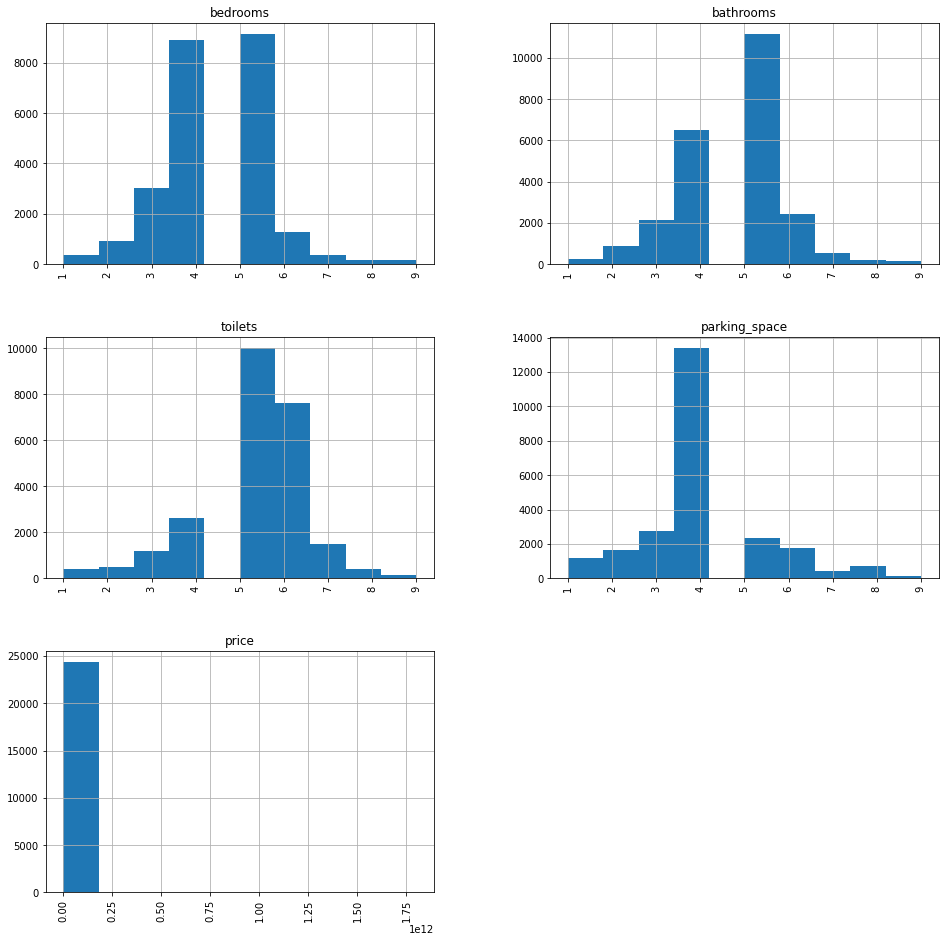

In [8]:
# Plotting histogram

df.hist(figsize=(16, 16), xrot=90)

plt.show()

### Checking Columns

In [9]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

### Categorical features

In [10]:
# Summarize the categorical features

df.describe(include=["object"])

title   town  state
count             24326  24326  24326
unique                7    189     25
top     Detached Duplex  Lekki  Lagos
freq              13992  10895  18445

### Federal States in Nigeria

In [11]:
# Identify the states represented in the dataframe

df["state"].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

#### Although there are 36 states (including the national capital) in Nigeria, the dataset only contains data on 25 states.

### Towns

In [12]:
# Identify the towns represented in the dataframe

df["town"].unique()

array(['Mabushi', 'Katampe', 'Lekki', 'Ajah', 'Epe', 'Lokogoma District',
       'Oredo', 'Victoria Island (VI)', 'Mowe Ofada', 'Ikeja', 'Ikoyi',
       'Magodo', 'Kaura', 'Galadimawa', 'Gwarinpa', 'Abeokuta North',
       'Lugbe District', 'Ibeju Lekki', 'Yaba', 'Sango Ota',
       'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Jahi', 'Ibadan', 'Orozo',
       'Ifo', 'Owerri North', 'Guzape District', 'Idu Industrial',
       'Owerri Municipal', 'Isheri North', 'Utako', 'Port Harcourt',
       'Kuje', 'Isheri', 'Life Camp', 'Ipaja', 'Ado-Odo/Ota', 'Dape',
       'Mushin', 'Ejigbo', 'Isolo', 'Ojodu', 'Gaduwa', 'Enugu', 'Dakwo',
       'Asokoro District', 'Alimosho', 'Sagamu', 'Chikun', 'Egbeda',
       'Wuye', 'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Ibafo',
       'Surulere', 'Obio-Akpor', 'Ayobo', 'Apo', 'Mowe Town',
       'Ibadan South-West', 'Wuse 2', 'Durumi', 'Simawa', 'Arepo',
       'Ikotun', 'Oluyole', 'Maitama District', 'Maryland', 'Ido',
       'Karsana', 'Wuse', 'Ilorin West', 

### Property Types

In [13]:
df["title"].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

## Data Cleaning 

#### Data cleaning involves the process of identifying inaccurate, incomplete or irrelevant parts of the data. This is carried out to prepare the data for analysis or storing in a database. It includes deleting missing values to removing irrelevant rows or columns.

### Check for duplicates

In [14]:
df.duplicated().sum()

10438

### Remove the duplicates

In [15]:
df.drop_duplicates(keep="first", inplace=True)
df.shape

print(f"The dataframe now consists of", df.shape[1],
      "columns and", df.shape[0], "rows.")

The dataframe now consists of 8 columns and 13888 rows.


#### By removing the duplicates, 42% of the datapoints are lost. This could be an indication of inaccurate and inefficient data collation techniques.

### Checking for missing values

In [16]:
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

#### There are no missing values in the dataframe.

## Outliers

### Identifying Outliers

#### The target column "price" will be checked for potential outliers.

In [17]:
df[["price"]].describe()

price
count  1.388800e+04
mean   4.002137e+08
std    1.614926e+10
min    9.000000e+04
25%    3.800000e+07
50%    7.500000e+07
75%    1.600000e+08
max    1.800000e+12

#### Visualise

<AxesSubplot:xlabel='price', ylabel='state'>

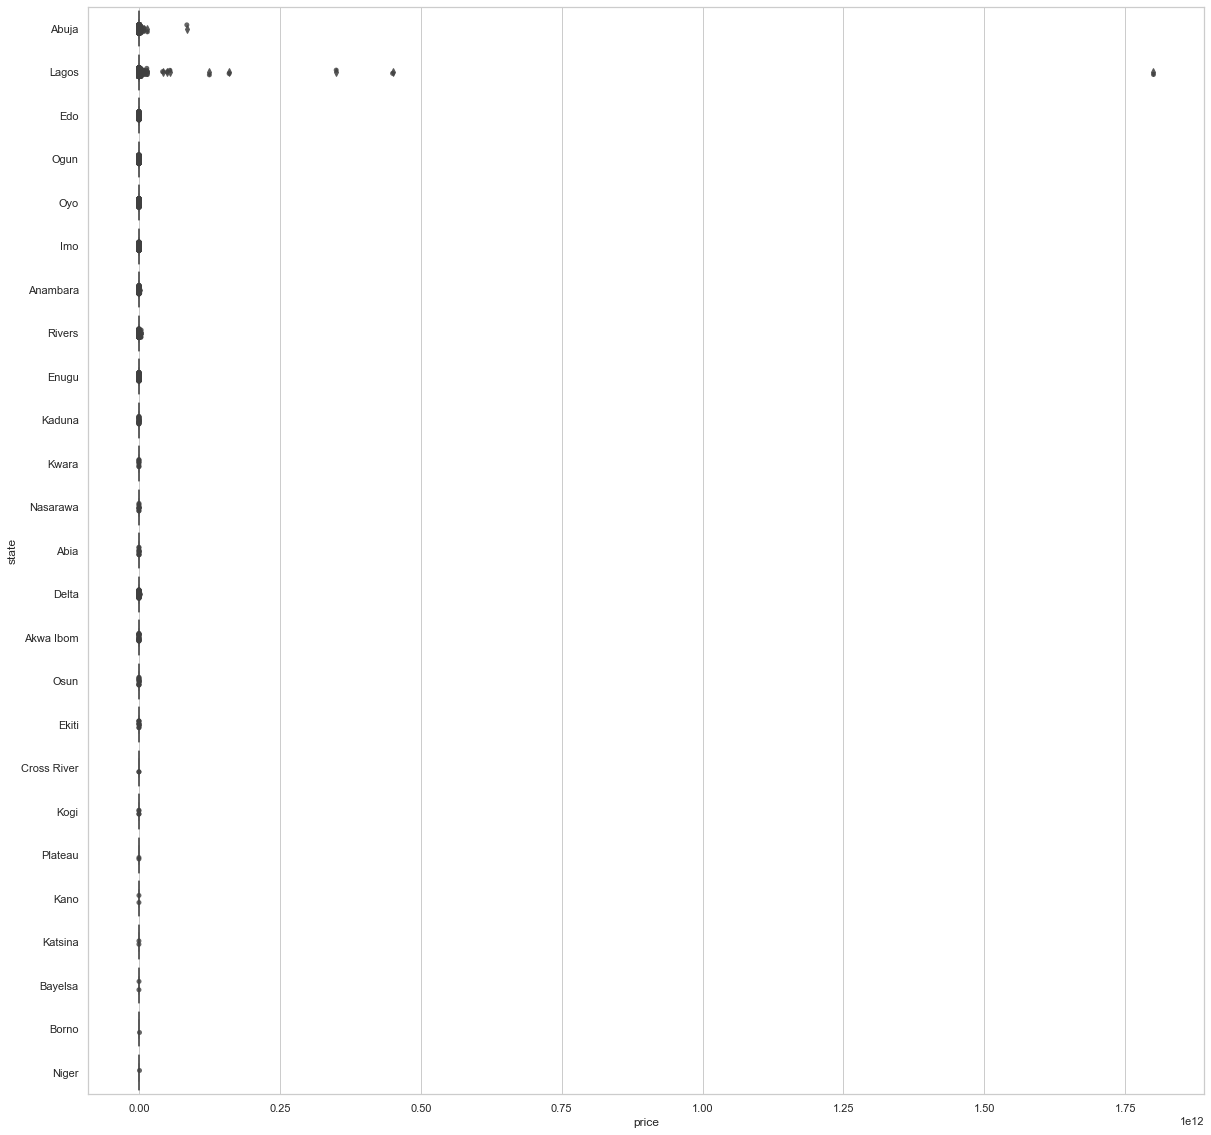

In [18]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df["price"], y=df["state"],  palette="Set2",)
sns.stripplot(x=df["price"], y=df["state"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

#### The box plot above show majority of the dataoiints on the left side, however, there some datapoints on the that appear distant from the other datapoints as you begin to scan towards the right part of the chart. These point indicate the presence of Outliers. These outliers are properties with significantly higher prices when compared to the property prices of other federal states within Nigeria. It shows that "Lagos" and "Abuja" appear to have these outliers. 

### InterQuantileRange (IQR)

In [19]:
# Calculating q1 and q3 for price
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
Q1, Q3

(38000000.0, 160000000.0)

In [20]:
# Calculating InterQuantileRange (IQR) for price
IQR = Q3 - Q1

print("The Interquartile Range for price is", IQR)

The Interquartile Range for price is 122000000.0


### Lower and Upper Limit

In [21]:
# For price
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-145000000.0, 343000000.0)

### Identifying the Outliers

In [22]:
price_outliers = df[(df.price < lower_limit)
                    | (df.price > upper_limit)]

price_outliers.shape

(1498, 8)

### Removing the Outliers

#### Check the shape before removing the outliers

In [23]:
Nigeria = df.shape
Nigeria

(13888, 8)

#### Remove the outliers using the IQR

In [24]:
df_outlier_free = df[(df.price > lower_limit)
                     & (df.price < upper_limit)]
df_outlier_free.shape

(12390, 8)

#### Visualise to validate changes 

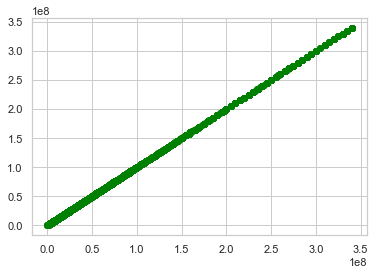

In [25]:
# Plotting scatter plot for living space

plt.scatter(x=df_outlier_free["price"],
            y=df_outlier_free["price"], color="green",)
plt.show()

<AxesSubplot:xlabel='price', ylabel='state'>

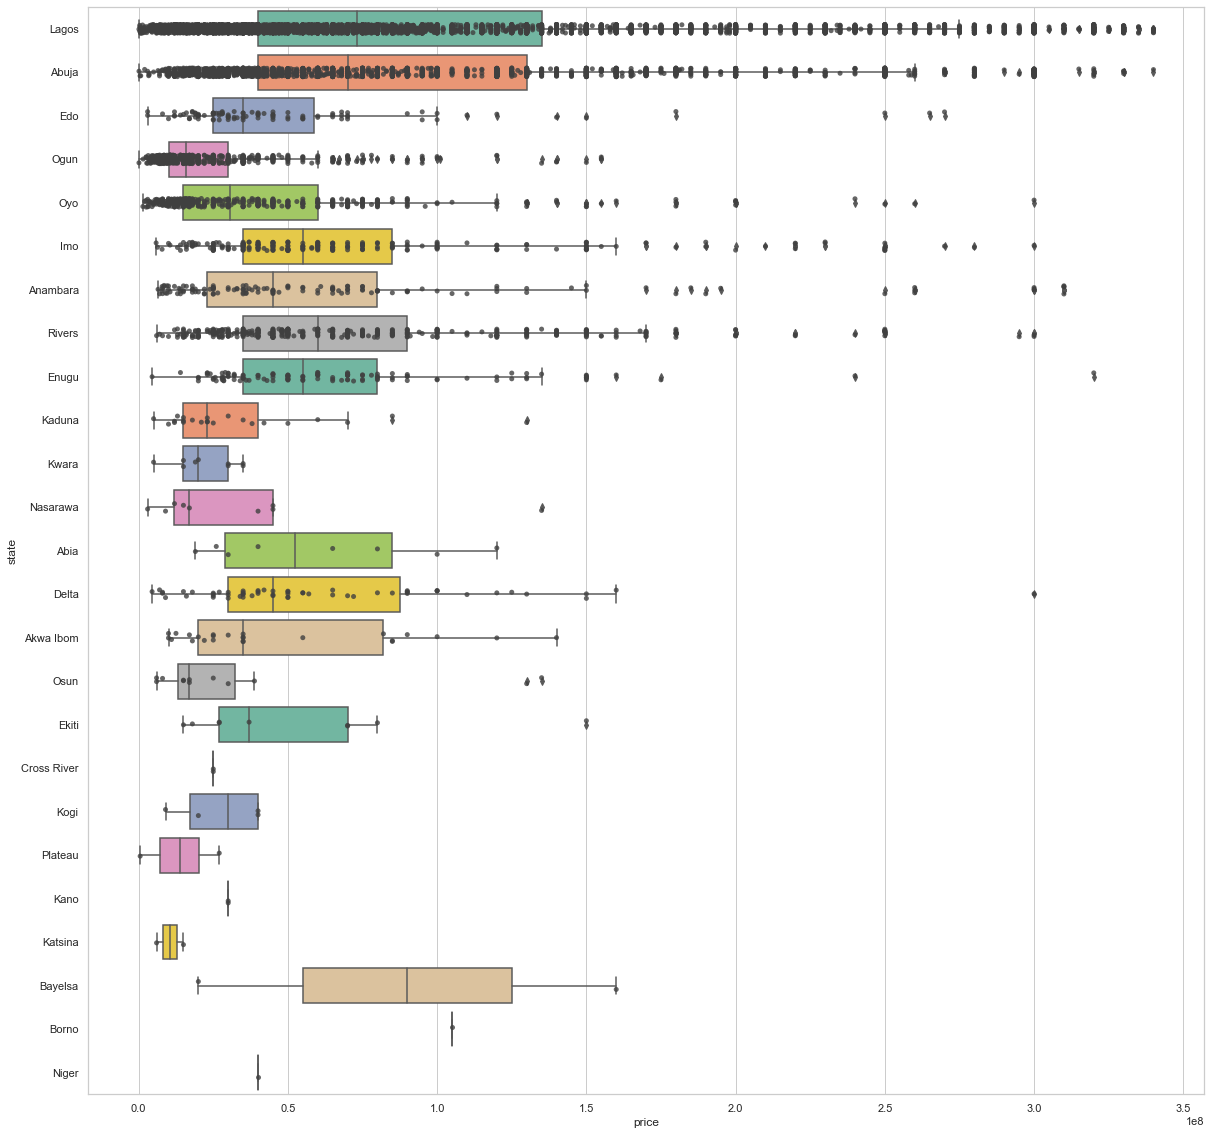

In [26]:
# Plotting a boxplot to validate changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_outlier_free["price"],
            y=df_outlier_free["state"],  palette="Set2",)
sns.stripplot(x=df_outlier_free["price"],
              y=df_outlier_free["state"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

#### There appear to be no outliers left.

#### Re-plotting the box plot indicates the absence of the outliers initially spotted. However, this chart reveals that "Abuja" and "Lagos" have properties with significantly higher prices than other states within Nigeria. For this reason, the dataset should split into subsets per state and the outliers should be removed per state. This will provide a more accurate analysis.

### REAL ESTATE MARKET TREND IN NIGERIA

### Distribution of Features of Properties in Nigeria

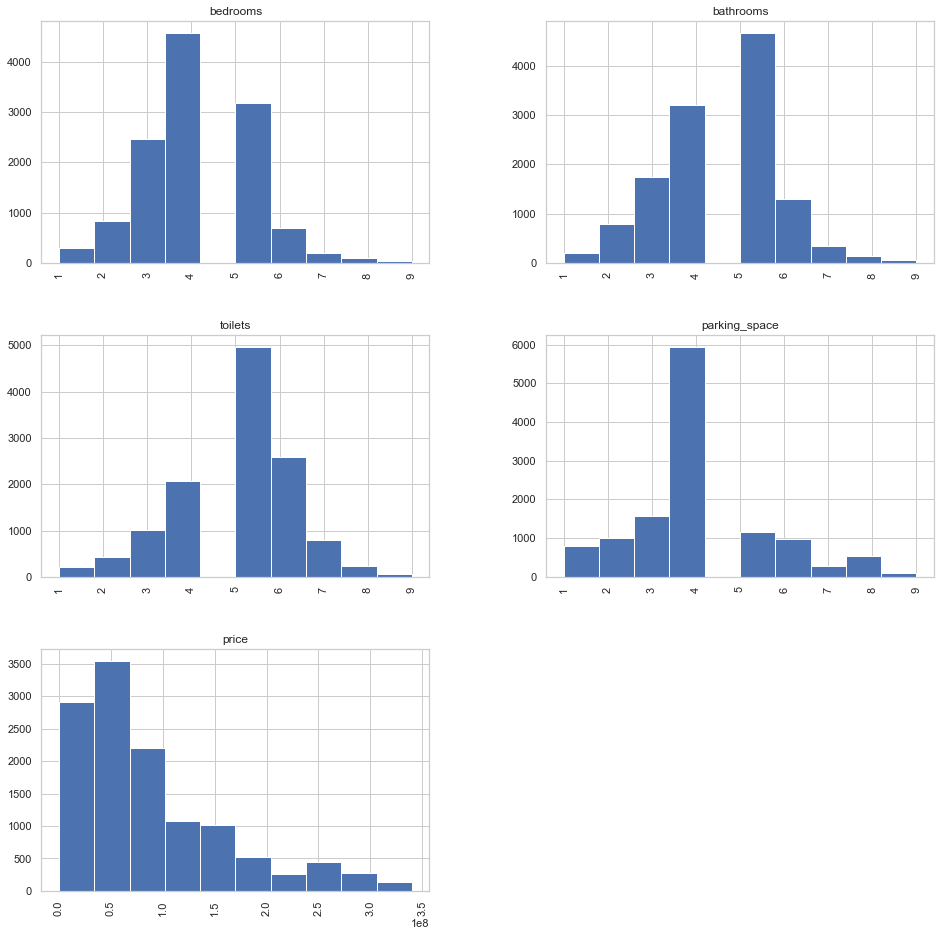

In [27]:
# Plotting histogram

df_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Skewness

In [28]:
df_outlier_free.skew(axis=1, skipna=True)

2        2.236068
3        2.236068
4        2.236068
6        2.236068
7        2.236068
           ...   
24315    2.236068
24320    2.236068
24321    2.236068
24322    2.236068
24324    2.236068
Length: 12390, dtype: float64

#### The price chart shows that the dataset is positively skewed i.e, there are more properties with extreme prices in the dataset. This raises the average property price.

### Average property price in Nigeria

In [29]:
average_price = st.mean(df_outlier_free["price"])

print("The average property price in Nigeria is " +
      str(round(average_price, 2)) + " Naira")

The average property price in Nigeria is 88358992.03 Naira


#### Visualise

In [30]:
# Using Groupby to get mean base rent for each state

average_price = df_outlier_free.groupby("state")["price"].mean()
average_price = average_price.rename("mean")

# Combine using concat
compare_states = pd.concat([average_price], axis=1)

# Plot line charts using Plotly library

fig = px.line(compare_states, title="Mean Property Price per State in Nigeria",
              color_discrete_sequence=["red"])

fig.update_layout(yaxis_title="price", legend_title="state", font_size=12)

fig.update_yaxes(rangemode="tozero")

fig.show()

In [31]:
# Plotting a bar chart

average_price = df_outlier_free.groupby(["state"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_outlier_free["state"].
                   value_counts().sort_index().index,
                   y=average_price,
                   color=df_outlier_free["state"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="state")
fig.update_yaxes(title="Average Property Price per state in Nigeria")
fig.show()

#### The above chart shows that the following federal states have the highest property prices:
#### - Abuja
#### - Anambara
#### - Bayelsa
#### - Borno
#### - Enugu
#### - Imo
#### - Lagos
#### - Rivers
#### Borno appears to have the highest property prices. 

### Most Common Property type

In [32]:
most_common = st.mode(df_outlier_free["title"])

print("The most common property type in Nigeria is " +
      str(most_common))

The most common property type in Nigeria is Detached Duplex


### Correlation

#### Correlation (corr()) represents the relationship between columns in a dataframe. The results are measured in a range; -1 to 1.
 #### When the result is 1, it indicates a perfect correlation. This means that the values in these columns increase and decrease simultaneously and are interdependent.
 #### A result of 0.9 indicates a good relationship also. This works as when the result is 1.
 #### A result of -0.9 also indicate a good relationship. However, in this case, when the values in one column rises, the value in the other column reduces.
 #### A result of 0.01 indicates a bad relationship. This means that the values in one column cannot be predicted based on the rise or fall of values in the other column.
 
#### This would reveal features that are independent and interdependent on other features.

In [33]:
df_outlier_free.corr()

bedrooms  bathrooms   toilets  parking_space     price
bedrooms       1.000000   0.699514  0.683452       0.187991  0.433314
bathrooms      0.699514   1.000000  0.805618       0.185427  0.371562
toilets        0.683452   0.805618  1.000000       0.192780  0.396733
parking_space  0.187991   0.185427  0.192780       1.000000  0.108696
price          0.433314   0.371562  0.396733       0.108696  1.000000

<AxesSubplot:>

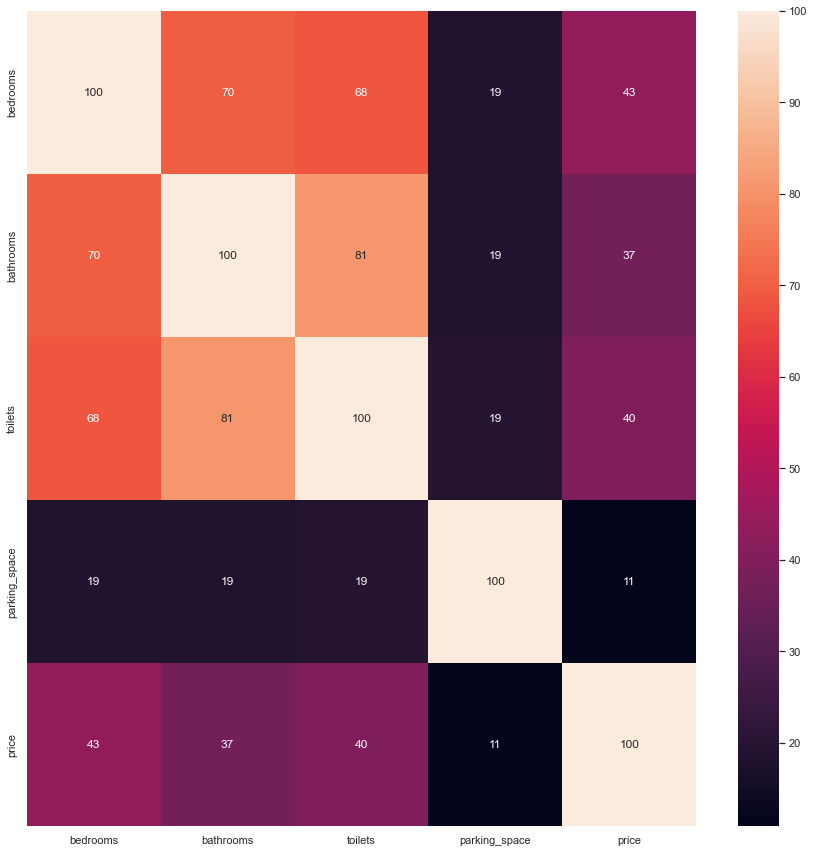

In [34]:
# Visualizing the correlations

# Set the size
plt.figure(figsize=(15, 15))

# Plotting a heatmap
sns.heatmap(df_outlier_free.corr()*100, annot=True, fmt='.0f')

#### Usually in real estate, the price is dependent on certian factors such as location, size, furnishing and features of the property. The heat map shows that the "number of bedrooms", "number of toilets", "parking space", and "number of bathrooms" correlates with the property price. 

## EXPLORING EACH FEDERAL STATE


#### Although the original dataframe has been cleaned and analysed, a deeper look into the dataframe is necessary. This is because the property prices vary vastly between certain federal states such as Lagos and Ogun. For more accurate analysis, it will be beneficial to explore each state individually.

### ABIA STATE

In [35]:
# Selecting data on only Abia

df_abi = df[df["state"] == "Abia"].reset_index(drop=True)
df_abi.head(3)

bedrooms  bathrooms  toilets  parking_space              title town state  \
0         4          5        5              4     Block of Flats  Aba  Abia   
1         4          4        5              6    Detached Duplex  Aba  Abia   
2         5          5        5              4  Detached Bungalow  Aba  Abia   

        price  
0  30000000.0  
1  40000000.0  
2  26000000.0

In [36]:
df_abi.shape
print(f"The new dataframe has", df_abi.shape[0],
      "rows and", df_abi.shape[1], "columns.")

The new dataframe has 9 rows and 8 columns.


### ABUJA

In [37]:
# Selecting data on only Abuja

df_abj = df[df["state"] == "Abuja"].reset_index(drop=True)
df_abj.head(3)

bedrooms  bathrooms  toilets  parking_space              title  \
0         6          5        5              4    Detached Duplex   
1         4          5        5              4  Terraced Duplexes   
2         3          4        5              4  Terraced Duplexes   

                town  state        price  
0            Mabushi  Abuja  450000000.0  
1            Katampe  Abuja  800000000.0  
2  Lokogoma District  Abuja   25000000.0

In [38]:
df_abj.shape
print(f"The new dataframe has", df_abj.shape[0],
      "rows and", df_abj.shape[1], "columns.")

The new dataframe has 3118 rows and 8 columns.


### AKWA IBOM

In [39]:
# Selecting data on only Akwa Ibom

df_akw = df[df["state"] == "Akwa Ibom"].reset_index(drop=True)
df_akw.head(3)

bedrooms  bathrooms  toilets  parking_space              title town  \
0         3          5        5              4     Block of Flats  Uyo   
1         2          2        3              5  Detached Bungalow  Uyo   
2         5          5        6              4  Terraced Duplexes  Uyo   

       state        price  
0  Akwa Ibom   55000000.0  
1  Akwa Ibom   10000000.0  
2  Akwa Ibom  100000000.0

In [40]:
df_akw.shape
print(f"The new dataframe has", df_akw.shape[0],
      "rows and", df_akw.shape[1], "columns.")

The new dataframe has 25 rows and 8 columns.


### ANAMBARA
#### Describe it 

In [41]:
# Selecting data on only Anambara

df_ana = df[df["state"] == "Anambara"].reset_index(drop=True)
df_ana.head(3)

bedrooms  bathrooms  toilets  parking_space                 title  \
0         5          5        6              4       Detached Duplex   
1         4          5        5              4        Block of Flats   
2         4          4        5              4  Semi Detached Duplex   

          town     state        price  
0        Lekki  Anambara  260000000.0  
1  Ibeju Lekki  Anambara    9000000.0  
2        Lekki  Anambara   75000000.0

In [42]:
df_ana.shape
print(f"The new dataframe has", df_ana.shape[0],
      "rows and", df_ana.shape[1], "columns.")

The new dataframe has 141 rows and 8 columns.


### BAYELSA

In [43]:
# Selecting data on only Bayelsa

df_bay = df[df["state"] == "Bayelsa"].reset_index(drop=True)
df_bay.head(3)

bedrooms  bathrooms  toilets  parking_space            title     town  \
0         4          5        5              4   Block of Flats  Yenagoa   
1         7          8        8              2  Detached Duplex  Yenagoa   

     state        price  
0  Bayelsa   20000000.0  
1  Bayelsa  160000000.0

In [44]:
df_bay.shape
print(f"The new dataframe has", df_bay.shape[0],
      "rows and", df_bay.shape[1], "columns.")

The new dataframe has 2 rows and 8 columns.


### BORNO

In [45]:
# Selecting data on only Borno

df_bor = df[df["state"] == "Borno"].reset_index(drop=True)
df_bor.head(3)

bedrooms  bathrooms  toilets  parking_space              title      town  \
0         4          4        5              4  Terraced Duplexes  Guzamala   

   state        price  
0  Borno  105000000.0

In [46]:
df_bor.shape
print(f"The new dataframe has", df_bor.shape[0],
      "rows and", df_bor.shape[1], "columns.")

The new dataframe has 1 rows and 8 columns.


### CROSS RIVER

In [47]:
# Selecting data on only Cross River

df_cro = df[df["state"] == "Cross River"].reset_index(drop=True)
df_cro.head(3)

bedrooms  bathrooms  toilets  parking_space            title     town  \
0         7          5        5              4   Block of Flats  Calabar   
1         4          4        5              4  Detached Duplex  Calabar   

         state       price  
0  Cross River  25000000.0  
1  Cross River  25000000.0

In [48]:
df_cro.shape
print(f"The new dataframe has", df_cro.shape[0],
      "rows and", df_cro.shape[1], "columns.")

The new dataframe has 2 rows and 8 columns.


### DELTA

In [49]:
# Selecting data on only Delta

df_del = df[df["state"] == "Delta"].reset_index(drop=True)
df_del.head(3)

bedrooms  bathrooms  toilets  parking_space                 title   town  \
0         5          5        6              6       Detached Duplex  Asaba   
1         4          4        5              5  Semi Detached Duplex  Asaba   
2         3          3        4              8     Detached Bungalow  Asaba   

   state        price  
0  Delta  100000000.0  
1  Delta   65000000.0  
2  Delta   55000000.0

In [50]:
df_del.shape
print(f"The new dataframe has", df_del.shape[0],
      "rows and", df_del.shape[1], "columns.")

The new dataframe has 62 rows and 8 columns.


### EDO

In [51]:
# Selecting data on only Edo

df_edo = df[df["state"] == "Edo"].reset_index(drop=True)
df_edo.head(3)

bedrooms  bathrooms  toilets  parking_space                 title   town  \
0         6          6        6              4  Semi Detached Duplex  Oredo   
1         5          5        6              1       Detached Duplex  Oredo   
2         8          8        8              4        Block of Flats  Oredo   

  state       price  
0   Edo  45000000.0  
1   Edo  70000000.0  
2   Edo  36000000.0

In [52]:
df_edo.shape
print(f"The new dataframe has", df_edo.shape[0],
      "rows and", df_edo.shape[1], "columns.")

The new dataframe has 98 rows and 8 columns.


### EKITI

In [53]:
# Selecting data on only Ekiti

df_eki = df[df["state"] == "Ekiti"].reset_index(drop=True)
df_eki.head(3)

bedrooms  bathrooms  toilets  parking_space              title       town  \
0         2          2        2              4     Block of Flats  Ado-Ekiti   
1         4          4        5              4  Detached Bungalow  Ado-Ekiti   
2         3          3        4              4  Detached Bungalow  Ado-Ekiti   

   state       price  
0  Ekiti  70000000.0  
1  Ekiti  70000000.0  
2  Ekiti  18000000.0

In [54]:
df_eki.shape
print(f"The new dataframe has", df_eki.shape[0],
      "rows and", df_eki.shape[1], "columns.")

The new dataframe has 9 rows and 8 columns.


### ENUGU

In [55]:
# Selecting data on only Enugu

df_enu = df[df["state"] == "Enugu"].reset_index(drop=True)
df_enu.head(3)

bedrooms  bathrooms  toilets  parking_space              title   town  \
0         4          4        5              4  Detached Bungalow  Enugu   
1         4          4        5              4    Detached Duplex  Enugu   
2         6          5        5              4  Detached Bungalow  Enugu   

   state       price  
0  Enugu  28500000.0  
1  Enugu  65000000.0  
2  Enugu  20000000.0

In [56]:
df_enu.shape
print(f"The new dataframe has", df_enu.shape[0],
      "rows and", df_enu.shape[1], "columns.")

The new dataframe has 121 rows and 8 columns.


### IMO

In [57]:
# Selecting data on only Imo

df_imo = df[df["state"] == "Imo"].reset_index(drop=True)
df_imo.head(3)

bedrooms  bathrooms  toilets  parking_space                 title  \
0         5          3        3              4       Detached Duplex   
1         5          5        6              5  Semi Detached Duplex   
2         4          5        5              4        Block of Flats   

               town state        price  
0      Owerri North   Imo   50000000.0  
1  Owerri Municipal   Imo   60000000.0  
2  Owerri Municipal   Imo  130000000.0

In [58]:
df_imo.shape
print(f"The new dataframe has", df_imo.shape[0],
      "rows and", df_imo.shape[1], "columns.")

The new dataframe has 229 rows and 8 columns.


### KADUNA

In [59]:
# Selecting data on only Kaduna

df_kad = df[df["state"] == "Kaduna"].reset_index(drop=True)
df_kad.head(3)

bedrooms  bathrooms  toilets  parking_space              title  \
0         5          5        5              1  Terraced Duplexes   
1         5          5        5              4  Detached Bungalow   
2         7          5        4              3    Detached Duplex   

           town   state       price  
0        Chikun  Kaduna  60000000.0  
1  Kaduna South  Kaduna  10000000.0  
2  Kaduna South  Kaduna  35000000.0

In [60]:
df_kad.shape
print(f"The new dataframe has", df_kad.shape[0],
      "rows and", df_kad.shape[1], "columns.")

The new dataframe has 23 rows and 8 columns.


### KANO

In [61]:
# Selecting data on only Kano

df_kan = df[df["state"] == "Kaduna"].reset_index(drop=True)
df_kan.head(3)

bedrooms  bathrooms  toilets  parking_space              title  \
0         5          5        5              1  Terraced Duplexes   
1         5          5        5              4  Detached Bungalow   
2         7          5        4              3    Detached Duplex   

           town   state       price  
0        Chikun  Kaduna  60000000.0  
1  Kaduna South  Kaduna  10000000.0  
2  Kaduna South  Kaduna  35000000.0

In [62]:
df_kan.shape
print(f"The new dataframe has", df_kan.shape[0],
      "rows and", df_kan.shape[1], "columns.")

The new dataframe has 23 rows and 8 columns.


### KASTINA

In [63]:
# Selecting data on only Kastina

df_kas = df[df["state"] == "Kastina"].reset_index(drop=True)
df_kas.head(3)

Empty DataFrame
Columns: [bedrooms, bathrooms, toilets, parking_space, title, town, state, price]
Index: []

In [64]:
df_kas.shape
print(f"The new dataframe has", df_kas.shape[0],
      "rows and", df_kas.shape[1], "columns.")

The new dataframe has 0 rows and 8 columns.


### KOGI

In [65]:
# Selecting data on only Kogi

df_kog = df[df["state"] == "Kogi"].reset_index(drop=True)
df_kog.head(3)

bedrooms  bathrooms  toilets  parking_space              title    town  \
0         3          3        3              4  Detached Bungalow  Dekina   
1         4          4        4              4    Detached Duplex  Lokoja   
2         3          5        5              1     Block of Flats   Okene   

  state       price  
0  Kogi  40000000.0  
1  Kogi  20000000.0  
2  Kogi  40000000.0

In [66]:
df_kog.shape
print(f"The new dataframe has", df_kog.shape[0],
      "rows and", df_kog.shape[1], "columns.")

The new dataframe has 4 rows and 8 columns.


### KWARA

In [67]:
# Selecting data on only Kwara

df_kwa = df[df["state"] == "kwara"].reset_index(drop=True)
df_kwa.head(3)

Empty DataFrame
Columns: [bedrooms, bathrooms, toilets, parking_space, title, town, state, price]
Index: []

In [68]:
df_kwa.shape
print(f"The new dataframe has", df_kwa.shape[0],
      "rows and", df_kwa.shape[1], "columns.")

The new dataframe has 0 rows and 8 columns.


### LAGOS

In [69]:
# Selecting data on only Lagos

df_lag = df[df["state"] == "Lagos"].reset_index(drop=True)
df_lag.head(3)

bedrooms  bathrooms  toilets  parking_space                 title   town  \
0         4          5        5              4       Detached Duplex  Lekki   
1         4          4        5              6       Detached Duplex   Ajah   
2         4          4        5              2  Semi Detached Duplex  Lekki   

   state        price  
0  Lagos  120000000.0  
1  Lagos   40000000.0  
2  Lagos   75000000.0

In [70]:
df_lag.shape
print(f"The new dataframe has", df_lag.shape[0],
      "rows and", df_lag.shape[1], "columns.")

The new dataframe has 8571 rows and 8 columns.


### NASARAWA

In [71]:
# Selecting data on only Nasarawa

df_nas = df[df["state"] == "Nasarawa"].reset_index(drop=True)
df_nas.head(3)

bedrooms  bathrooms  toilets  parking_space              title      town  \
0         3          2        2              4     Block of Flats      Karu   
1         3          5        5              4  Detached Bungalow  Nasarawa   
2         3          3        4              3  Detached Bungalow      Karu   

      state       price  
0  Nasarawa  17000000.0  
1  Nasarawa  15000000.0  
2  Nasarawa   9000000.0

In [72]:
df_nas.shape
print(f"The new dataframe has", df_nas.shape[0],
      "rows and", df_nas.shape[1], "columns.")

The new dataframe has 9 rows and 8 columns.


### NIGER

In [73]:
# Selecting data on only Niger

df_nig = df[df["state"] == "Niger"].reset_index(drop=True)
df_nig.head(3)

bedrooms  bathrooms  toilets  parking_space           title     town  \
0         2          2        3              5  Block of Flats  Paikoro   

   state       price  
0  Niger  40000000.0

In [74]:
df_nig.shape
print(f"The new dataframe has", df_nig.shape[0],
      "rows and", df_nig.shape[1], "columns.")

The new dataframe has 1 rows and 8 columns.


### OGUN

In [75]:
# Selecting data on only Ogun

df_ogu = df[df["state"] == "Ogun"].reset_index(drop=True)
df_ogu.head(3)

bedrooms  bathrooms  toilets  parking_space              title  \
0         3          4        4              3  Detached Bungalow   
1         2          3        5              4     Block of Flats   
2         2          2        2              4  Detached Bungalow   

             town state       price  
0      Mowe Ofada  Ogun  12000000.0  
1      Mowe Ofada  Ogun   7000000.0  
2  Abeokuta North  Ogun   4000000.0

In [76]:
df_ogu.shape
print(f"The new dataframe has", df_ogu.shape[0],
      "rows and", df_ogu.shape[1], "columns.")

The new dataframe has 579 rows and 8 columns.


### OSUN

In [77]:
# Selecting data on only Osun

df_osu = df[df["state"] == "Osun"].reset_index(drop=True)
df_osu.head(3)

bedrooms  bathrooms  toilets  parking_space                   title  \
0         3          4        4              4          Block of Flats   
1         2          3        3              4  Semi Detached Bungalow   
2         1          1        1              2       Detached Bungalow   

     town state        price  
0  Osogbo  Osun   25000000.0  
1  Osogbo  Osun    6000000.0  
2  Osogbo  Osun  135000000.0

In [78]:
df_osu.shape
print(f"The new dataframe has", df_osu.shape[0],
      "rows and", df_osu.shape[1], "columns.")

The new dataframe has 12 rows and 8 columns.


### OYO

In [79]:
# Selecting data on only Oyo

df_oyo = df[df["state"] == "Oyo"].reset_index(drop=True)
df_oyo.head(3)

bedrooms  bathrooms  toilets  parking_space              title    town  \
0         3          3        3              4  Detached Bungalow  Ibadan   
1         8          1        1              4    Detached Duplex  Ibadan   
2         3          2        2              4  Detached Bungalow  Ibadan   

  state        price  
0   Oyo   10000000.0  
1   Oyo  150000000.0  
2   Oyo   11000000.0

In [80]:
df_oyo.shape
print(f"The new dataframe has", df_oyo.shape[0],
      "rows and", df_oyo.shape[1], "columns.")

The new dataframe has 435 rows and 8 columns.


### PLATEAU

In [81]:
# Selecting data on only Plateau

df_pla = df[df["state"] == "Plateau"].reset_index(drop=True)
df_pla.head(3)

bedrooms  bathrooms  toilets  parking_space            title       town  \
0         2          7        8              7  Detached Duplex  Jos South   
1         7          4        4              4  Detached Duplex  Jos North   

     state       price  
0  Plateau    500000.0  
1  Plateau  27000000.0

In [82]:
df_pla.shape
print(f"The new dataframe has", df_pla.shape[0],
      "rows and", df_pla.shape[1], "columns.")

The new dataframe has 2 rows and 8 columns.


### RIVERS

In [83]:
# Selecting data on only Rivers

df_riv = df[df["state"] == "Rivers"].reset_index(drop=True)
df_riv.head(3)

bedrooms  bathrooms  toilets  parking_space                 title  \
0         4          5        5              4  Semi Detached Duplex   
1         4          5        5              5     Detached Bungalow   
2         4          4        5              1     Detached Bungalow   

            town   state       price  
0  Port Harcourt  Rivers  85000000.0  
1  Port Harcourt  Rivers  32000000.0  
2  Port Harcourt  Rivers  30000000.0

In [84]:
df_riv.shape
print(f"The new dataframe has", df_riv.shape[0],
      "rows and", df_riv.shape[1], "columns.")

The new dataframe has 422 rows and 8 columns.


#### Having explored each federal state only states with a dataframe of 50+ rows will be considered for data analysis. 
#### States with 50+ rows; Abuja, Anambara, Delta, Edo, Enugu, Imo, Lagos, Ogun, Oyo, and Rivers.
#### States with less than 50+ rows; Abia, Akwa Ibom, Bayelsa, Borno, Cross River, Ekiti, Kaduna, Kano, Kastina, Kogi, Kwara, Nasarawa, Niger, Ogun and Plateau

## ABUJA STATE (Federal Capital Territory)

In [85]:
# Selecting data on only Abuja

df_abj = df[df["state"] == "Abuja"].reset_index(drop=True)
df_abj.head(5)

bedrooms  bathrooms  toilets  parking_space              title  \
0         6          5        5              4    Detached Duplex   
1         4          5        5              4  Terraced Duplexes   
2         3          4        5              4  Terraced Duplexes   
3         3          3        4              4  Detached Bungalow   
4         5          6        7              6    Detached Duplex   

                town  state        price  
0            Mabushi  Abuja  450000000.0  
1            Katampe  Abuja  800000000.0  
2  Lokogoma District  Abuja   25000000.0  
3  Lokogoma District  Abuja   37000000.0  
4            Katampe  Abuja  160000000.0

In [86]:
df_abj.shape
print(f"The new dataframe has", df_abj.shape[0],
      "rows and", df_abj.shape[1], "columns.")

The new dataframe has 3118 rows and 8 columns.


In [87]:
df_abj.describe()

bedrooms    bathrooms      toilets  parking_space         price
count  3118.000000  3118.000000  3118.000000    3118.000000  3.118000e+03
mean      4.315266     4.646889     5.108403       4.035600  2.399512e+08
std       1.366342     1.369523     1.406406       1.659792  1.593757e+09
min       1.000000     1.000000     1.000000       1.000000  1.100000e+05
25%       4.000000     4.000000     5.000000       3.000000  4.500000e+07
50%       4.000000     5.000000     5.000000       4.000000  8.500000e+07
75%       5.000000     5.000000     6.000000       4.000000  1.900000e+08
max       9.000000     9.000000     9.000000       9.000000  8.500000e+10

### Categorical features

In [88]:
# Summarize the categorical features

df_abj.describe(include=["object"])

title      town  state
count              3118      3118   3118
unique                7        53      1
top     Detached Duplex  Gwarinpa  Abuja
freq               1283       345   3118

#### There are 

### Towns in Abuja

In [89]:
df_abj["town"].unique()

array(['Mabushi', 'Katampe', 'Lokogoma District', 'Kaura', 'Galadimawa',
       'Gwarinpa', 'Lugbe District', 'Jahi', 'Orozo', 'Guzape District',
       'Idu Industrial', 'Utako', 'Kuje', 'Life Camp', 'Dape', 'Gaduwa',
       'Dakwo', 'Asokoro District', 'Wuye', 'Kubwa', 'Apo', 'Wuse 2',
       'Durumi', 'Maitama District', 'Karsana', 'Wuse', 'Kurudu', 'Karmo',
       'Gudu', 'Kukwaba', 'Mbora (Nbora)', 'Jabi', 'Garki', 'Karshi',
       'Kado', 'Nyanya', 'Kyami', 'Dutse', 'Karu', 'Kafe', 'Dakibiyu',
       'Bwari', 'Kagini', 'Mpape', 'Gwagwalada', 'Diplomatic Zones',
       'Kabusa', 'Dei-Dei', 'Duboyi', 'Jikwoyi',
       'Central Business District', 'Wumba', 'Mararaba'], dtype=object)

### Property Types

In [90]:
df_abj["title"].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Detached Bungalow',
       'Semi Detached Duplex', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

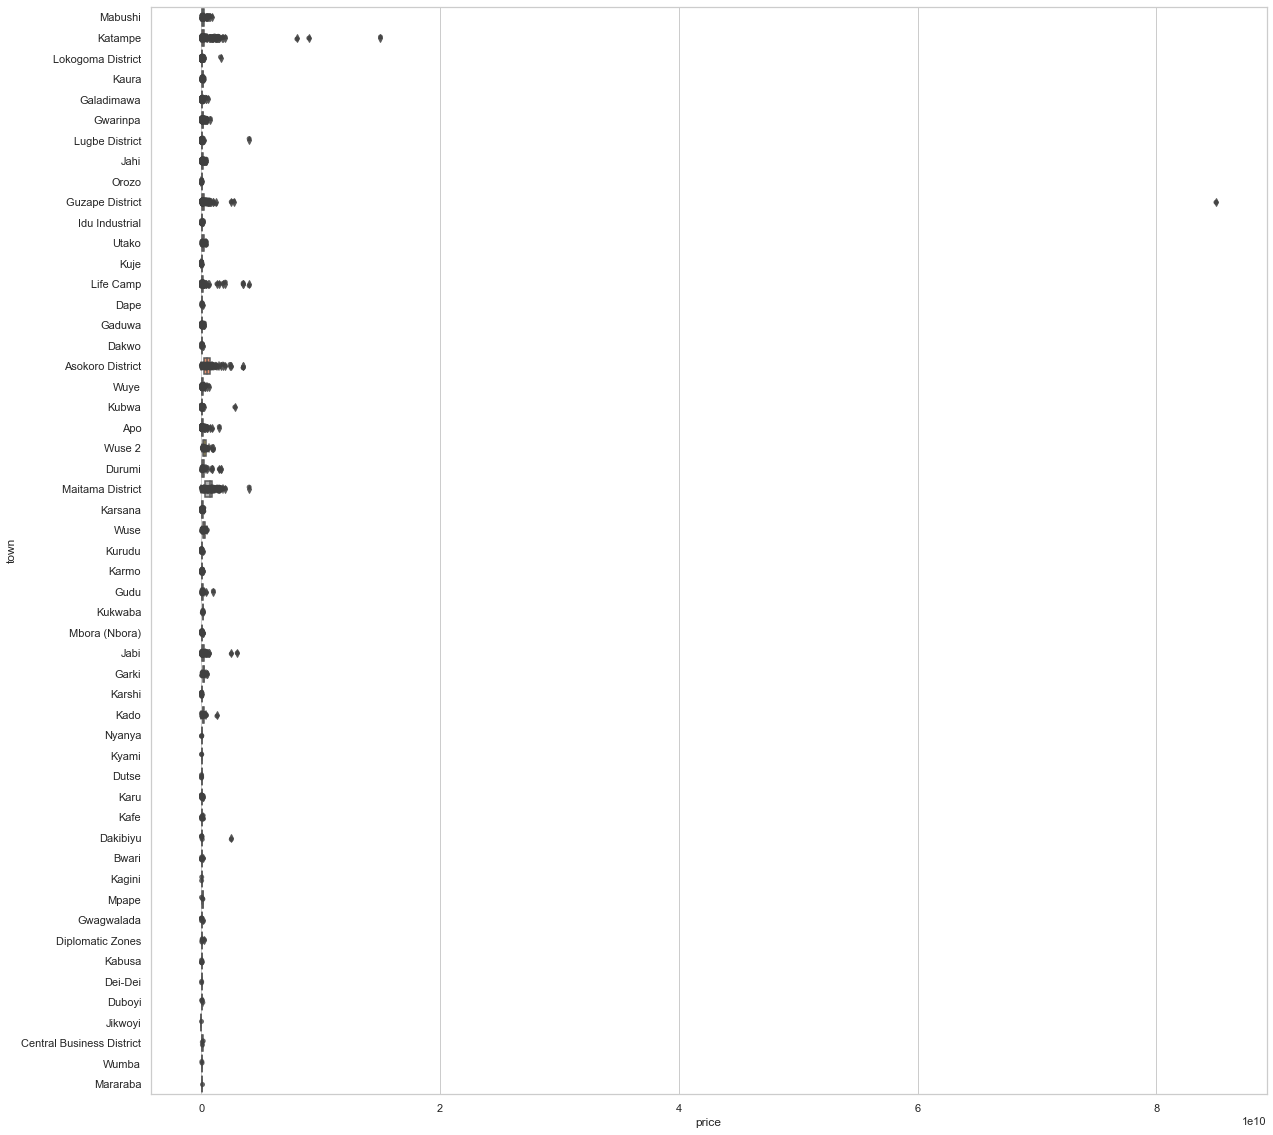

In [91]:
# Visualise

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_abj["price"], y=df_abj["town"],  palette="Set2",)
sns.stripplot(x=df_abj["price"], y=df_abj["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [92]:
# Calculating q1 and q3 for price
abj_Q1 = df_abj.price.quantile(0.25)
abj_Q3 = df_abj.price.quantile(0.75)
abj_Q1, abj_Q3

(45000000.0, 190000000.0)

In [93]:
# Calculating InterQuantileRange (IQR) for price
abj_IQR = abj_Q3 - abj_Q1

print("The Interquartile Range for the price is", abj_IQR)

The Interquartile Range for the price is 145000000.0


### Lower and Upper Limit

In [94]:
# For price
abj_lower_limit = Q1 - 1.5*abj_IQR
abj_upper_limit = Q3 + 1.5*abj_IQR
abj_lower_limit, abj_upper_limit

(-179500000.0, 377500000.0)

### Identifying the Outliers

In [95]:
abj_price_outliers = df_abj[(df_abj.price < abj_lower_limit)
                            | (df_abj.price > abj_upper_limit)]

abj_price_outliers.shape

(413, 8)

### Removing the Outliers

In [96]:
# Check the shape before removing the outliers

Abuja = df_abj.shape
Abuja

(3118, 8)

In [97]:
# Remove the outliers using the IQR

df_abj_outlier_free = df_abj[(df_abj.price > abj_lower_limit)
                             & (df_abj.price < abj_upper_limit)]
df_abj_outlier_free.shape

(2705, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

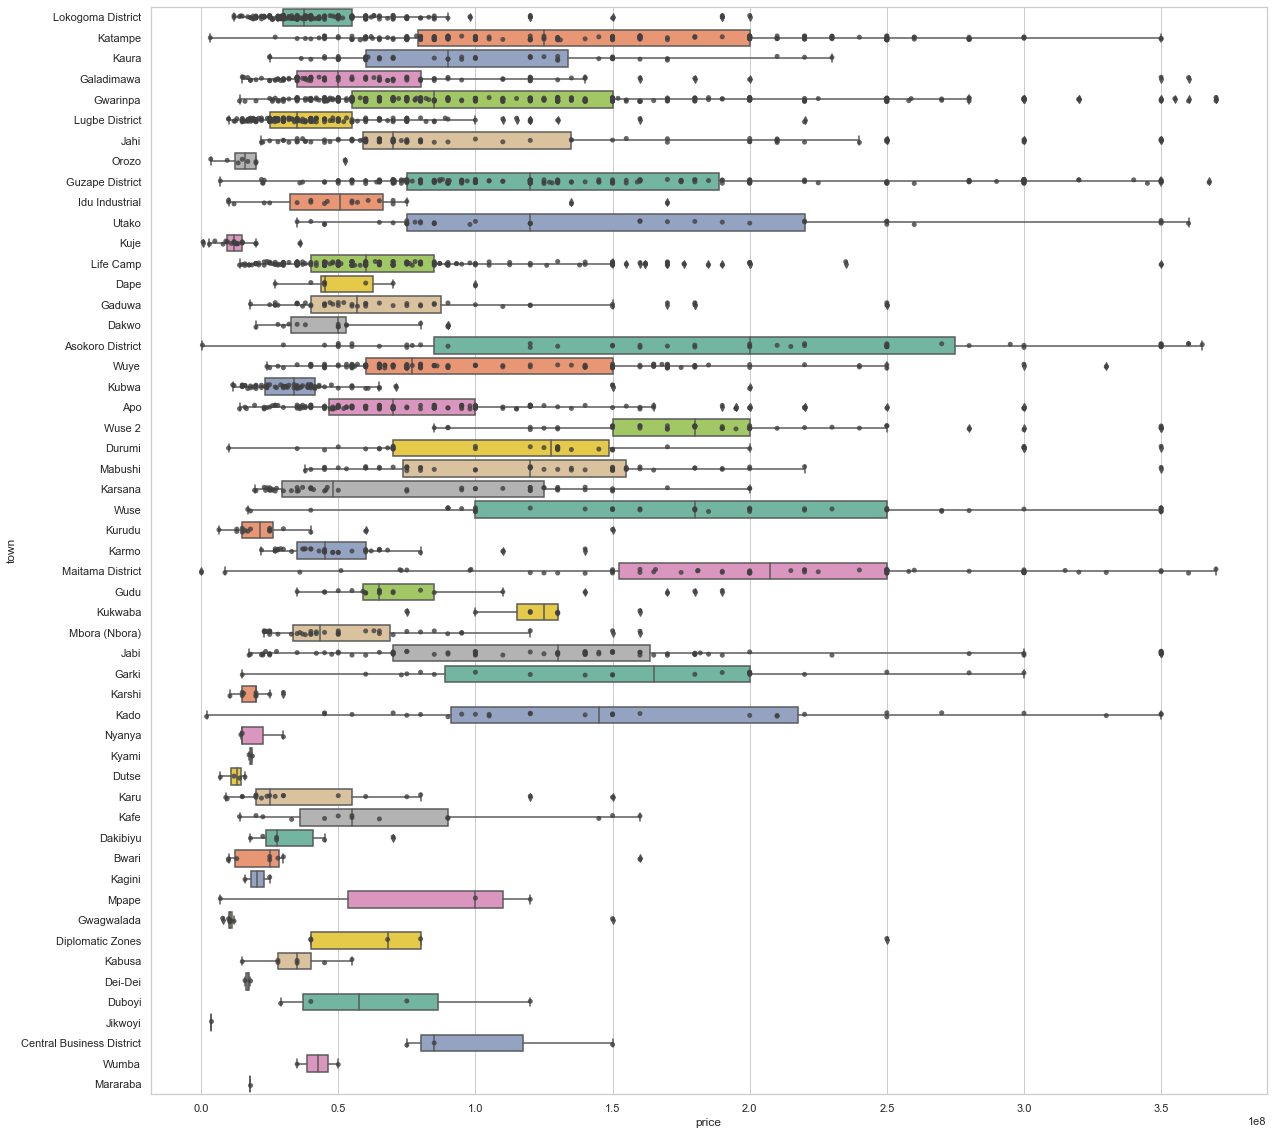

In [98]:
# Visualise to validate changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_abj_outlier_free["price"],
            y=df_abj_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_abj_outlier_free["price"],
              y=df_abj_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### ABUJA REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Abuja

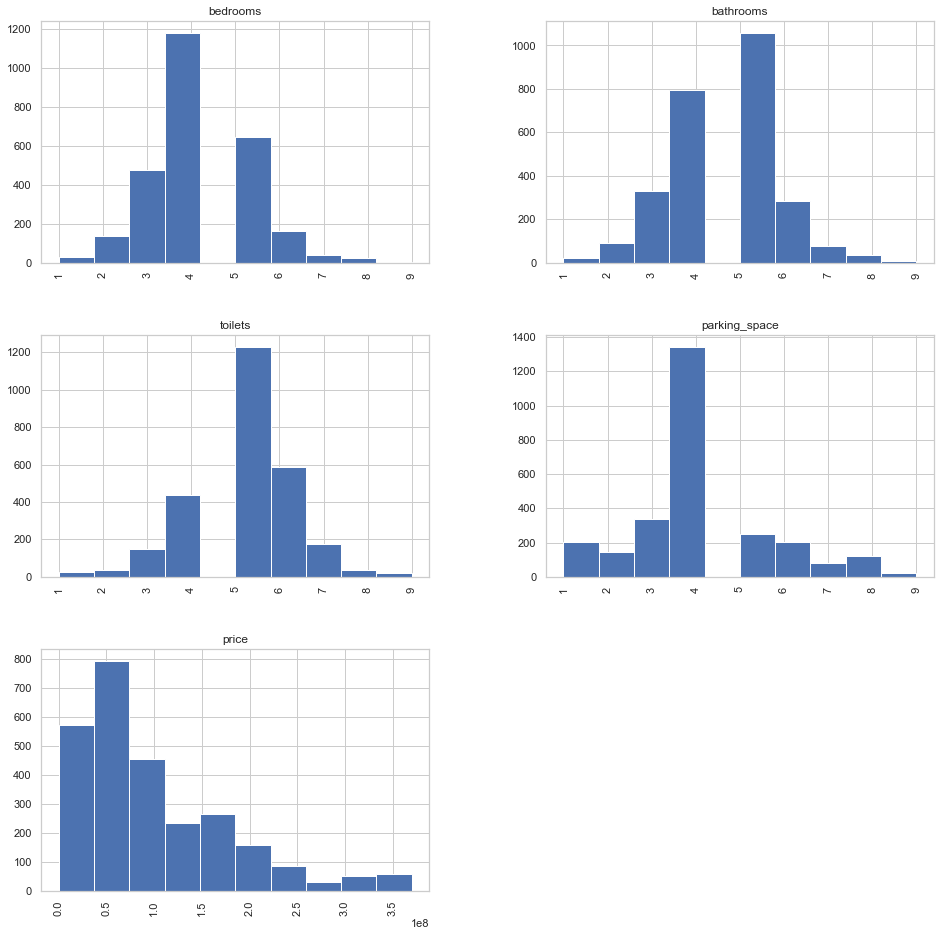

In [99]:
# Plotting histogram

df_abj_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Abuja

In [100]:
average_price_abj = st.mean(df_abj_outlier_free["price"])

print("The average property price in Abuja is " +
      str(round(average_price_abj, 2)) + " Naira")

The average property price in Abuja is 99302320.7 Naira


#### Visualise

In [101]:
# Plotting a bar chart for average price per town

average_price_abj = df_abj_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_abj_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=average_price_abj,
                   color=df_abj_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Abuja State")
fig.show()

#### Maitama District, Asokoro District, Wuse and Wuse 2 appear to be the most expensive towns to live in Abuja State.

### Most Common Property Type

In [102]:
abj_most_common = st.mode(df_abj_outlier_free["title"])

print("The most common property type in Abuja State is " +
      str(abj_most_common))

The most common property type in Abuja State is Detached Duplex


## Anambara

In [103]:
# Selecting data on only Anambara

df_ana = df[df["state"] == "Anambara"].reset_index(drop=True)
df_ana.head(3)

bedrooms  bathrooms  toilets  parking_space                 title  \
0         5          5        6              4       Detached Duplex   
1         4          5        5              4        Block of Flats   
2         4          4        5              4  Semi Detached Duplex   

          town     state        price  
0        Lekki  Anambara  260000000.0  
1  Ibeju Lekki  Anambara    9000000.0  
2        Lekki  Anambara   75000000.0

In [104]:
df_ana.shape
print(f"The new dataframe has", df_ana.shape[0],
      "rows and", df_ana.shape[1], "columns.")

The new dataframe has 141 rows and 8 columns.


### Towns in Anambara

In [105]:
df_ana["town"].unique()

array(['Lekki', 'Ibeju Lekki', 'Agege', 'Ikoyi', 'Mowe Ofada', 'Yaba',
       'Ifako-Ijaiye', 'Mowe Town', 'Port Harcourt', 'Ajah', 'Ikeja',
       'Alimosho', 'Ibadan', 'Ketu', 'Mbora (Nbora)',
       'Victoria Island (VI)', 'Gwarinpa', 'Akure', 'Karu', 'Ikorodu',
       'Ikotun', 'Lokogoma District', 'Shomolu', 'Guzape District',
       'Owerri Municipal', 'Katampe', 'Magboro', 'Gbagada', 'Ojo',
       'Arepo', 'Jabi'], dtype=object)

#### A quick Google search shows that these towns do not exist in Anambara state. This indicative of wrongly collated data. The data on Anambara state cannot be used for analysis.

### DELTA

In [106]:
# Selecting data on only Delta

df_del = df[df["state"] == "Delta"].reset_index(drop=True)
df_del.head(5)

bedrooms  bathrooms  toilets  parking_space                 title   town  \
0         5          5        6              6       Detached Duplex  Asaba   
1         4          4        5              5  Semi Detached Duplex  Asaba   
2         3          3        4              8     Detached Bungalow  Asaba   
3         4          4        5              5       Detached Duplex  Asaba   
4         5          5        6              5       Detached Duplex  Asaba   

   state        price  
0  Delta  100000000.0  
1  Delta   65000000.0  
2  Delta   55000000.0  
3  Delta   70000000.0  
4  Delta   40000000.0

In [107]:
df_del.shape
print(f"The new dataframe has", df_del.shape[0],
      "rows and", df_del.shape[1], "columns.")

The new dataframe has 62 rows and 8 columns.


In [108]:
df_del.describe()

bedrooms  bathrooms    toilets  parking_space         price
count  62.000000  62.000000  62.000000      62.000000  6.200000e+01
mean    4.129032   4.467742   5.032258       4.112903  1.041210e+08
std     1.273743   1.433987   1.492800       1.660583  2.241452e+08
min     1.000000   2.000000   2.000000       1.000000  4.500000e+06
25%     3.000000   3.000000   5.000000       4.000000  3.100000e+07
50%     4.000000   5.000000   5.000000       4.000000  5.000000e+07
75%     5.000000   5.000000   6.000000       5.000000  9.000000e+07
max     7.000000   9.000000   9.000000       8.000000  1.500000e+09

### Categorical features

In [109]:
# Summarize the categorical features

df_del.describe(include=["object"])

title   town  state
count                62     62     62
unique                7     10      1
top     Detached Duplex  Asaba  Delta
freq                 22     50     62

### Towns in Delta

In [110]:
df_del["town"].unique()

array(['Asaba', 'Ethiope West', 'Udu', 'Warri', 'Uvwie', 'Aniocha South',
       'Okpe', 'Ughelli South', 'Ughelli North', 'Abraka'], dtype=object)

### Property Types

In [111]:
df_del["title"].unique()

array(['Detached Duplex', 'Semi Detached Duplex', 'Detached Bungalow',
       'Block of Flats', 'Terraced Duplexes', 'Terraced Bungalow',
       'Semi Detached Bungalow'], dtype=object)

### InterQuantileRange (IQR)

<AxesSubplot:xlabel='price', ylabel='town'>

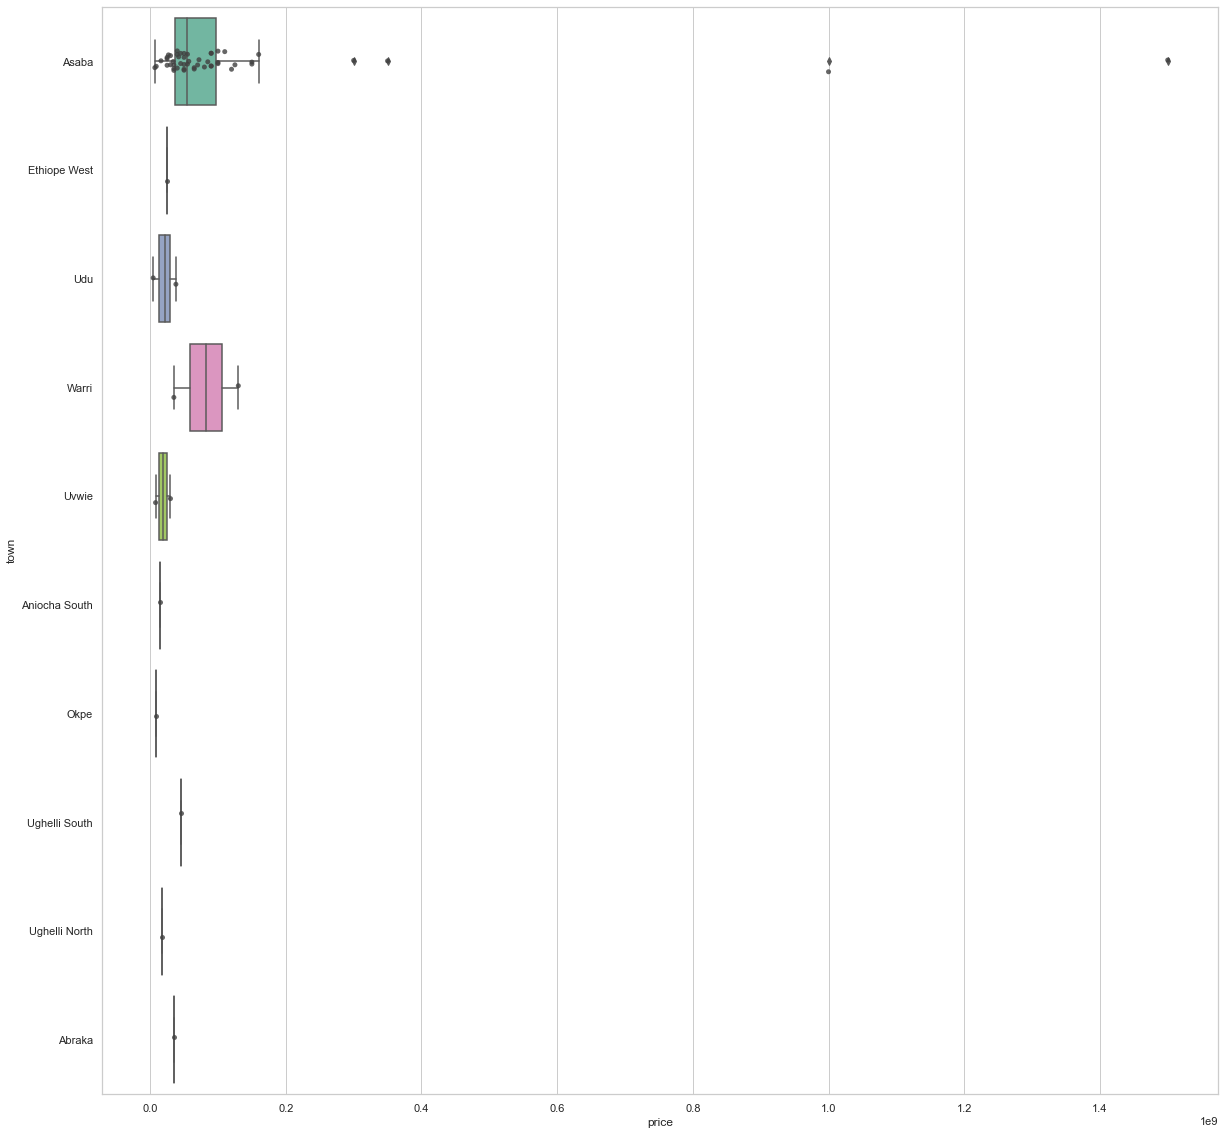

In [112]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_del["price"], y=df_del["town"],  palette="Set2",)
sns.stripplot(x=df_del["price"], y=df_del["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [113]:
# Calculating q1 and q3 for price
del_Q1 = df_del.price.quantile(0.25)
del_Q3 = df_del.price.quantile(0.75)
del_Q1, del_Q3

(31000000.0, 90000000.0)

In [114]:
# Calculating InterQuantileRange (IQR) for price
del_IQR = del_Q3 - del_Q1

print("The Interquartile Range for the price is", del_IQR)

The Interquartile Range for the price is 59000000.0


In [115]:
# Lower and Upper Limit

del_lower_limit = Q1 - 1.5*del_IQR
del_upper_limit = Q3 + 1.5*del_IQR
del_lower_limit, del_upper_limit

(-50500000.0, 248500000.0)

In [116]:
# Identifying the Outliers

del_price_outliers = df_del[(df_del.price < del_lower_limit)
                            | (df_del.price > del_upper_limit)]

del_price_outliers.shape

(4, 8)

### Removing the Outliers

In [117]:
# Check the shape before removing the outliers

Delta = df_del.shape
Delta

(62, 8)

In [118]:
# Remove the outliers using the IQR

df_del_outlier_free = df_del[(df_del.price > del_lower_limit)
                             & (df_del.price < del_upper_limit)]
df_del_outlier_free.shape

(58, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

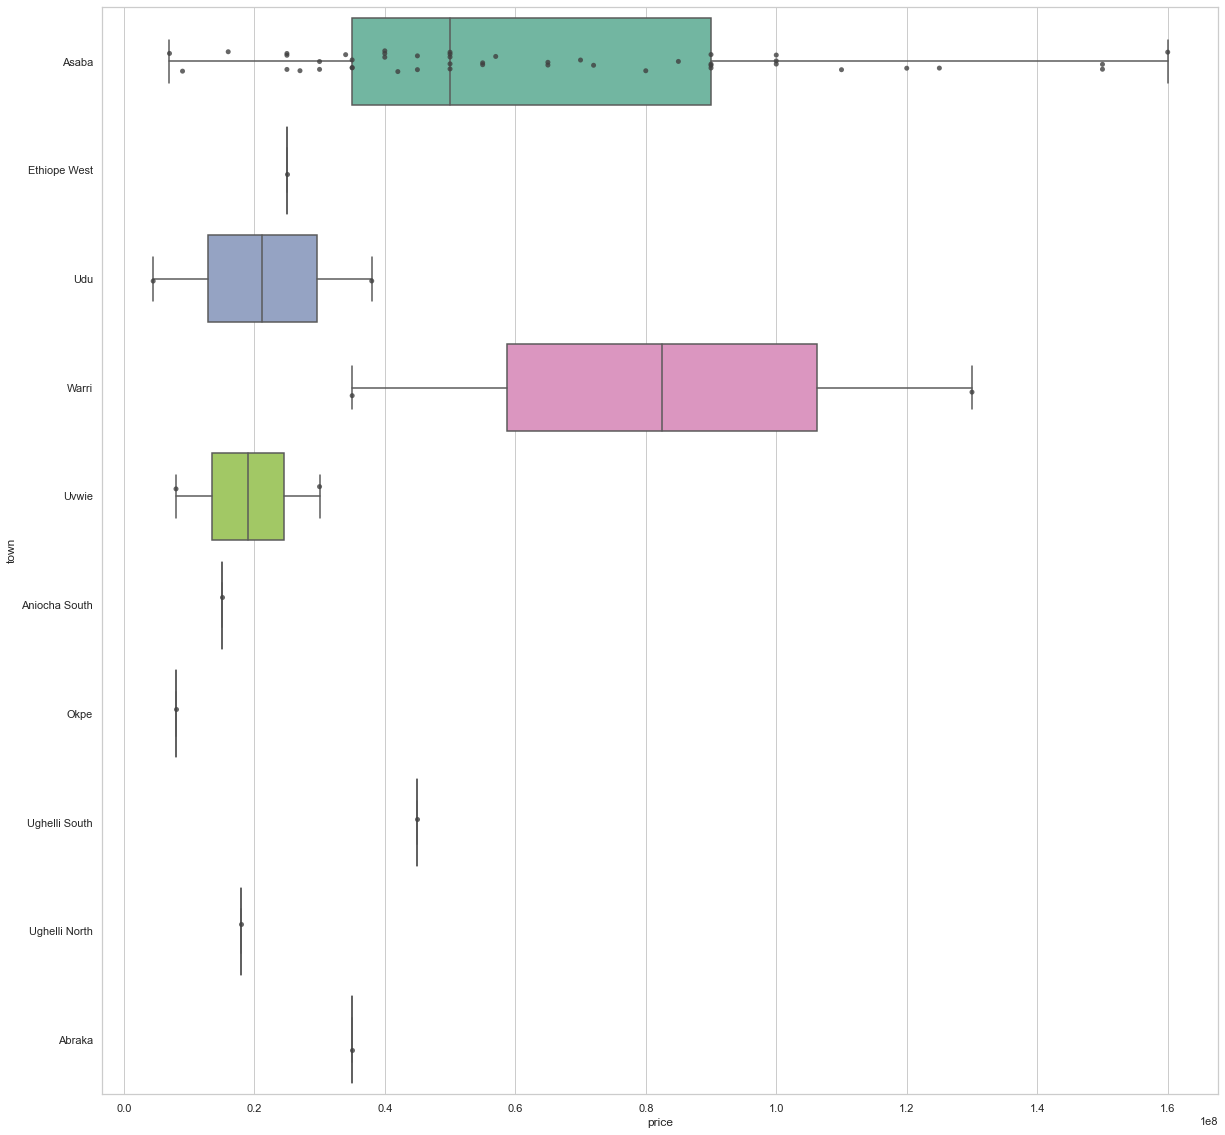

In [119]:
# Plotting a boxplot to validate the changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_del_outlier_free["price"],
            y=df_del_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_del_outlier_free["price"],
              y=df_del_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### DELTA REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Delta

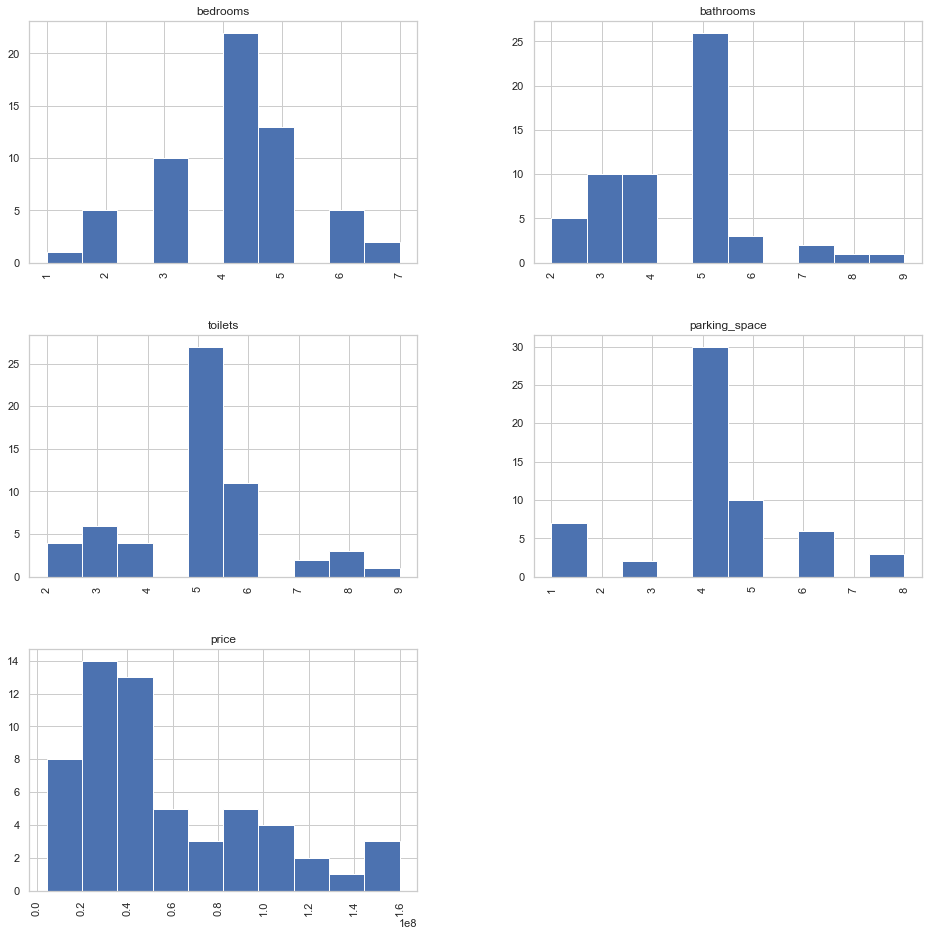

In [120]:
# Plotting histogram

df_del_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Delta

In [121]:
del_average_price = st.mean(df_del_outlier_free["price"])

print("The average property price in Delta is " +
      str(round(del_average_price, 2)) + " Naira")

The average property price in Delta is 56991379.31 Naira


In [122]:
# Visualise

# Plotting a bar chart

del_average_price = df_del_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_del_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=del_average_price,
                   color=df_del_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Delta State")
fig.show()

#### Warri and Asaba appear to be the most expensive towns to live in Delta State.

### Most Common Property Type

In [123]:
del_most_common = st.mode(df_del_outlier_free["title"])

print("The most common property type in Delta State is " +
      str(del_most_common))

The most common property type in Delta State is Detached Duplex


### EDO

In [124]:
# Selecting data on only Edo

df_edo = df[df["state"] == "Edo"].reset_index(drop=True)
df_edo.head(5)

bedrooms  bathrooms  toilets  parking_space                 title   town  \
0         6          6        6              4  Semi Detached Duplex  Oredo   
1         5          5        6              1       Detached Duplex  Oredo   
2         8          8        8              4        Block of Flats  Oredo   
3         3          2        2              4        Block of Flats  Oredo   
4         4          5        5              4        Block of Flats  Oredo   

  state       price  
0   Edo  45000000.0  
1   Edo  70000000.0  
2   Edo  36000000.0  
3   Edo  25000000.0  
4   Edo  35000000.0

In [125]:
df_edo.shape
print(f"The new dataframe has", df_edo.shape[0],
      "rows and", df_edo.shape[1], "columns.")

The new dataframe has 98 rows and 8 columns.


In [126]:
df_edo.describe()

bedrooms  bathrooms    toilets  parking_space         price
count  98.000000  98.000000  98.000000      98.000000  9.800000e+01
mean    4.224490   4.581633   4.571429       3.642857  5.022449e+07
std     1.665481   1.698535   1.692920       1.561456  4.915944e+07
min     1.000000   1.000000   1.000000       1.000000  3.000000e+06
25%     3.000000   4.000000   4.000000       4.000000  2.500000e+07
50%     4.000000   5.000000   5.000000       4.000000  3.500000e+07
75%     5.000000   5.000000   5.000000       4.000000  5.875000e+07
max     9.000000   9.000000   9.000000       9.000000  2.700000e+08

### Categorical features

In [127]:
# Summarize the categorical features

df_edo.describe(include=["object"])

title   town state
count               98     98    98
unique               6      5     1
top     Block of Flats  Oredo   Edo
freq                42     90    98

### Towns in Edo

In [128]:
df_edo["town"].unique()

array(['Oredo', 'Egor', 'Ovia North-East', 'Uhunmwonde', 'Ikpoba Okha'],
      dtype=object)

### Property Types

In [129]:
df_edo["title"].unique()

array(['Semi Detached Duplex', 'Detached Duplex', 'Block of Flats',
       'Detached Bungalow', 'Terraced Duplexes', 'Terraced Bungalow'],
      dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

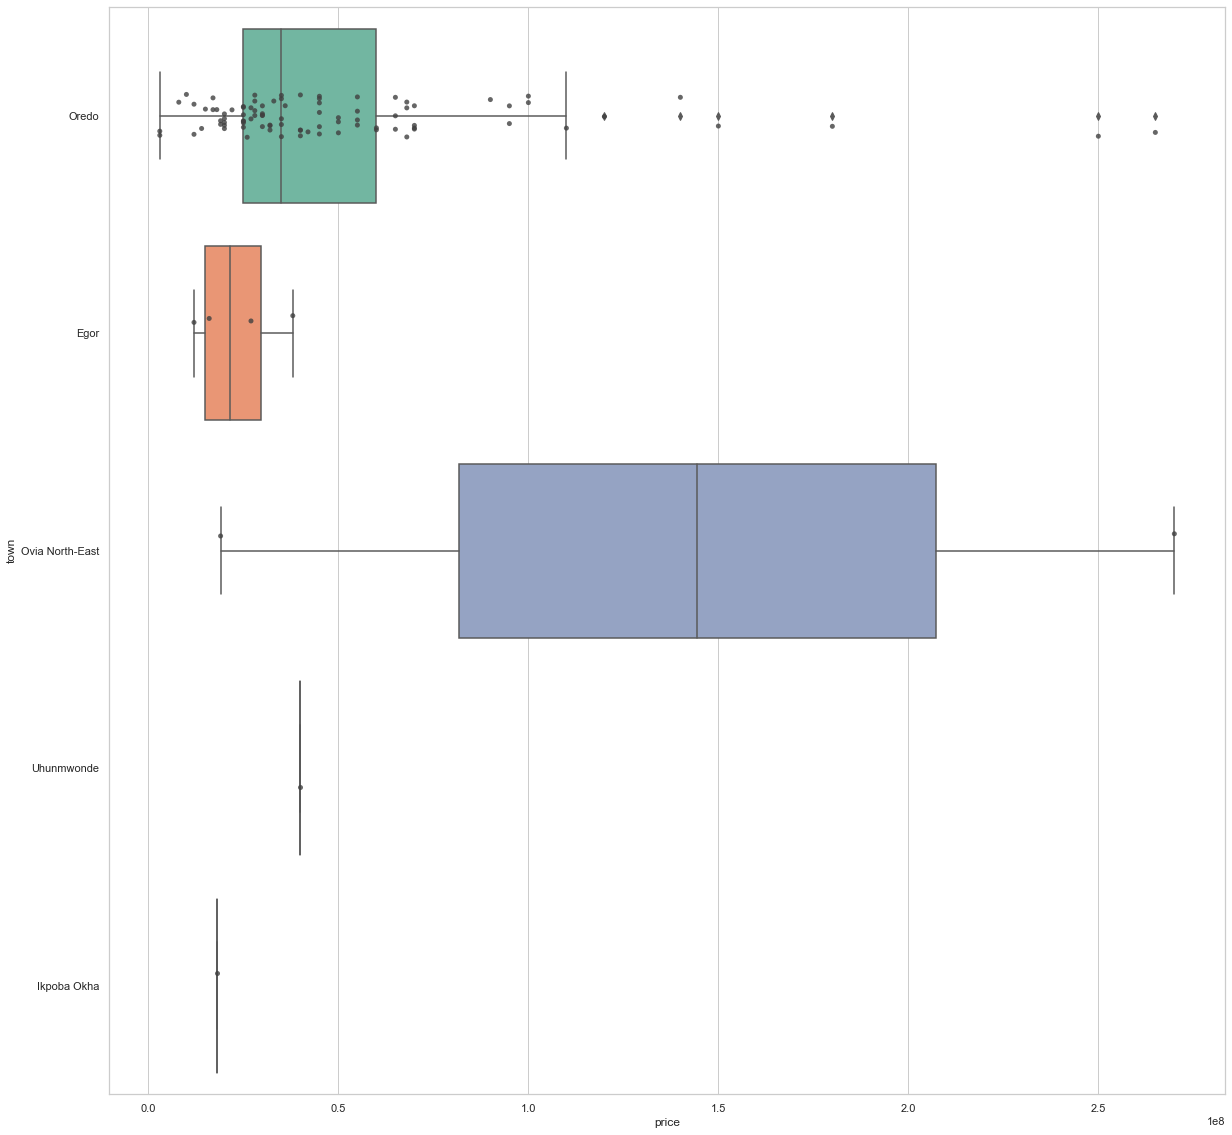

In [130]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_edo["price"], y=df_edo["town"],  palette="Set2",)
sns.stripplot(x=df_edo["price"], y=df_edo["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [131]:
# Calculating q1 and q3 for price

edo_Q1 = df_edo.price.quantile(0.25)
edo_Q3 = df_edo.price.quantile(0.75)
edo_Q1, edo_Q3

(25000000.0, 58750000.0)

In [132]:
# Calculating InterQuantileRange (IQR) for price

edo_IQR = edo_Q3 - edo_Q1

print("The Interquartile Range for the price is", edo_IQR)

The Interquartile Range for the price is 33750000.0


In [133]:
# Lower and Upper Limit

edo_lower_limit = Q1 - 1.5*edo_IQR
edo_upper_limit = Q3 + 1.5*edo_IQR
edo_lower_limit, edo_upper_limit

(-12625000.0, 210625000.0)

In [134]:
# Identifying the Outliers
edo_price_outliers = df_edo[(df_edo.price < edo_lower_limit)
                            | (df_edo.price > edo_upper_limit)]

edo_price_outliers.shape

(3, 8)

### Removing the Outliers

In [135]:
# Check the shape before removing the outliers

Edo = df_edo.shape
Edo

(98, 8)

In [136]:
# Remove the outliers using the IQR

df_edo_outlier_free = df_edo[(df_edo.price > edo_lower_limit)
                             & (df_edo.price < edo_upper_limit)]
df_edo_outlier_free.shape

(95, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

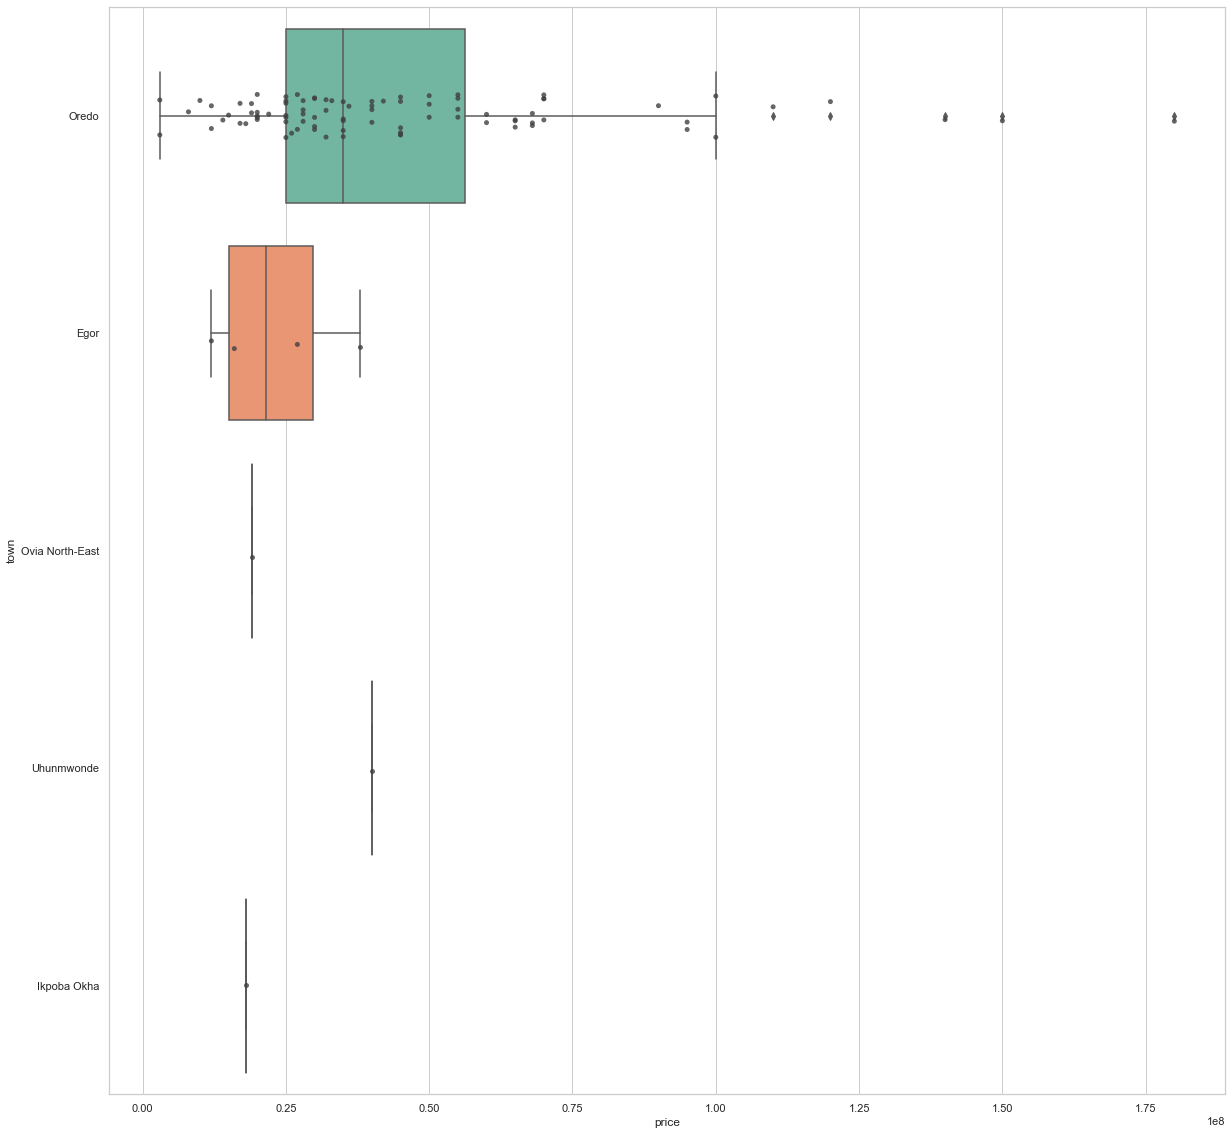

In [137]:
# Plotting a boxplot to validate changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_edo_outlier_free["price"],
            y=df_edo_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_edo_outlier_free["price"],
              y=df_edo_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### EDO REAL ESTATE MARKET TREND (Data Analysis) 

### Distribution of Features of Properties in Edo

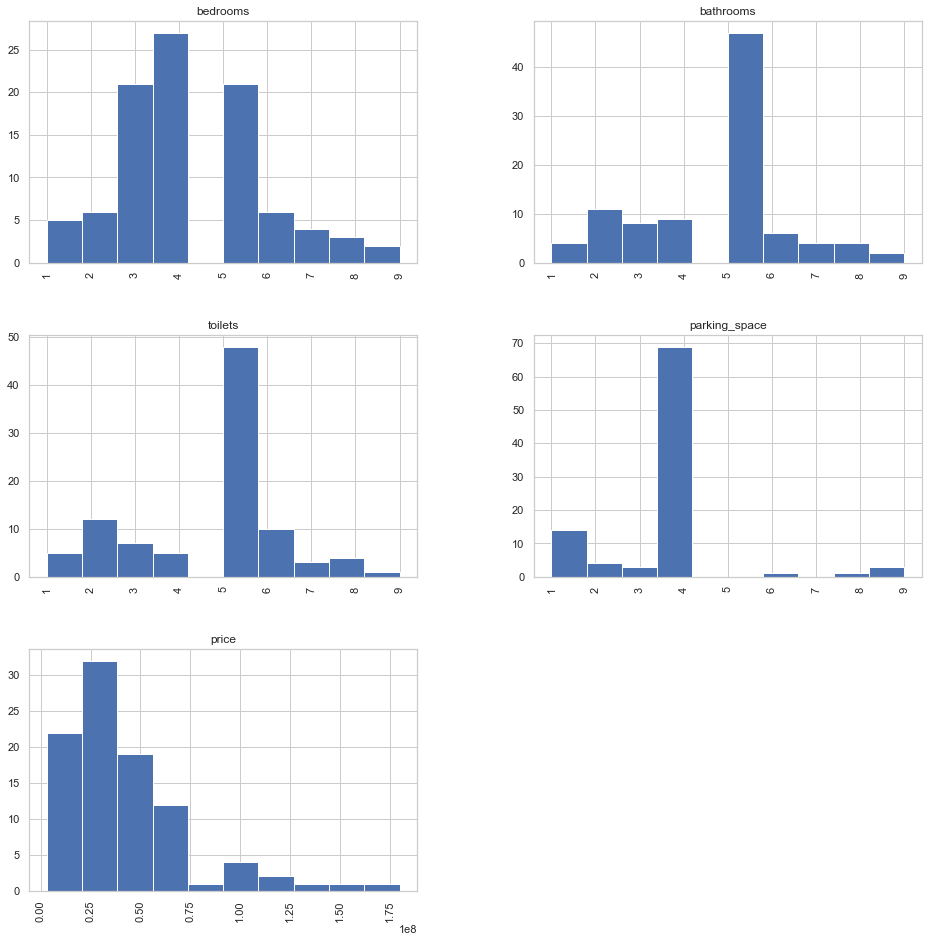

In [138]:
# Plotting histogram

df_edo_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Edo

In [139]:
edo_average_price = st.mean(df_edo_outlier_free["price"])

print("The average property price in Edo is " +
      str(round(edo_average_price, 2)) + " Naira")

The average property price in Edo is 43547368.42 Naira


In [140]:
# Visualise

# Plotting a bar chart

edo_average_price = df_edo_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_edo_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=edo_average_price,
                   color=df_edo_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Edo State")
fig.show()

#### Oredo appears to be the most expensive town to live in Edo State.

### Most Common Property Type

In [141]:
edo_most_common = st.mode(df_edo_outlier_free["title"])

print("The most common property type in Edo State is " +
      str(edo_most_common))

The most common property type in Edo State is Block of Flats


### ENUGU

In [142]:
# Selecting data on only Enugu

df_enu = df[df["state"] == "Enugu"].reset_index(drop=True)
df_enu.head(3)

bedrooms  bathrooms  toilets  parking_space              title   town  \
0         4          4        5              4  Detached Bungalow  Enugu   
1         4          4        5              4    Detached Duplex  Enugu   
2         6          5        5              4  Detached Bungalow  Enugu   

   state       price  
0  Enugu  28500000.0  
1  Enugu  65000000.0  
2  Enugu  20000000.0

In [143]:
df_enu.shape
print(f"The new dataframe has", df_enu.shape[0],
      "rows and", df_enu.shape[1], "columns.")

The new dataframe has 121 rows and 8 columns.


In [144]:
df_enu.describe()

bedrooms   bathrooms     toilets  parking_space         price
count  121.000000  121.000000  121.000000     121.000000  1.210000e+02
mean     4.181818    4.462810    4.793388       4.355372  6.667479e+07
std      1.244990    1.477844    1.448662       1.892351  4.600634e+07
min      1.000000    1.000000    1.000000       1.000000  4.500000e+06
25%      4.000000    4.000000    4.000000       4.000000  3.500000e+07
50%      4.000000    4.000000    5.000000       4.000000  5.500000e+07
75%      5.000000    5.000000    5.000000       6.000000  8.000000e+07
max      9.000000    9.000000    8.000000       8.000000  3.200000e+08

In [145]:
# Summarize the categorical features

df_enu.describe(include=["object"])

title   town  state
count               121    121    121
unique                7      1      1
top     Detached Duplex  Enugu  Enugu
freq                 48    121    121

### Towns in Enugu

In [146]:
df_enu["town"].unique()

array(['Enugu'], dtype=object)

#### The dataset contains data on only Enugu town.

### Property Types

In [147]:
df_enu["title"].unique()

array(['Detached Bungalow', 'Detached Duplex', 'Block of Flats',
       'Terraced Duplexes', 'Semi Detached Duplex',
       'Semi Detached Bungalow', 'Terraced Bungalow'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

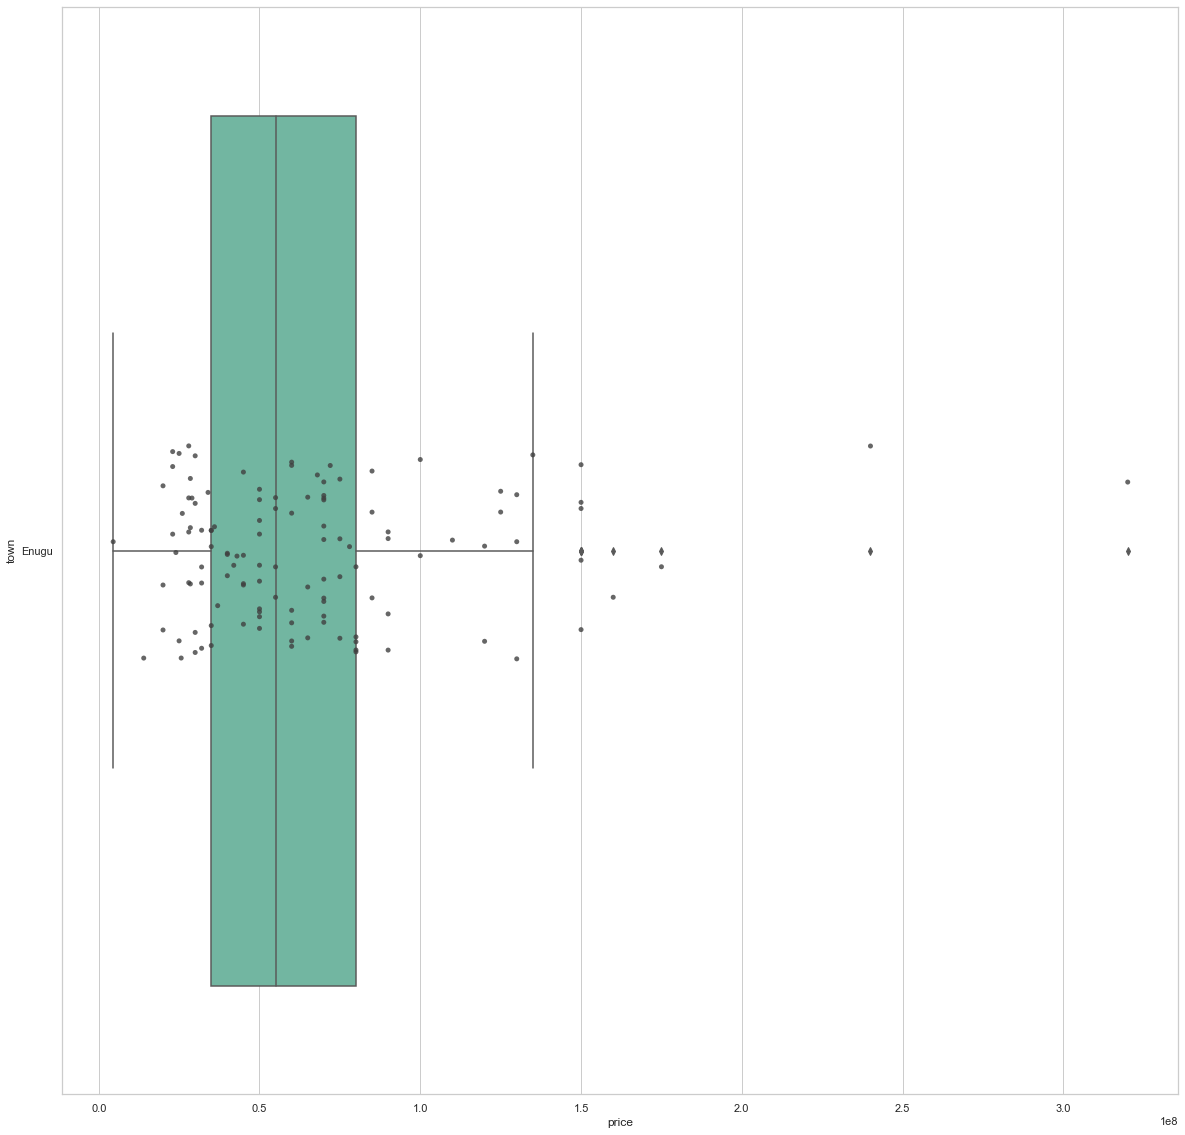

In [148]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_enu["price"], y=df_enu["town"],  palette="Set2",)
sns.stripplot(x=df_enu["price"], y=df_enu["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [149]:
# Calculating q1 and q3 for price
enu_Q1 = df_enu.price.quantile(0.25)
enu_Q3 = df_enu.price.quantile(0.75)
enu_Q1, enu_Q3

(35000000.0, 80000000.0)

In [150]:
# Calculating InterQuantileRange (IQR) for price
enu_IQR = enu_Q3 - enu_Q1

print("The Interquartile Range for the price is", enu_IQR)

The Interquartile Range for the price is 45000000.0


In [151]:
# Lower and Upper Limit

enu_lower_limit = Q1 - 1.5*enu_IQR
enu_upper_limit = Q3 + 1.5*enu_IQR
enu_lower_limit, enu_upper_limit

(-29500000.0, 227500000.0)

In [152]:
# Identifying the Outliers

enu_price_outliers = df_enu[(df_enu.price < enu_lower_limit)
                            | (df_enu.price > enu_upper_limit)]
enu_price_outliers.shape

(2, 8)

### Removing the Outliers

In [153]:
# Check the shape before removing the outliers

Enugu = df_enu.shape
Enugu

(121, 8)

In [154]:
# Remove the outliers using the IQR

df_enu_outlier_free = df_enu[(df_enu.price > enu_lower_limit)
                             & (df_enu.price < enu_upper_limit)]
df_enu_outlier_free.shape

(119, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

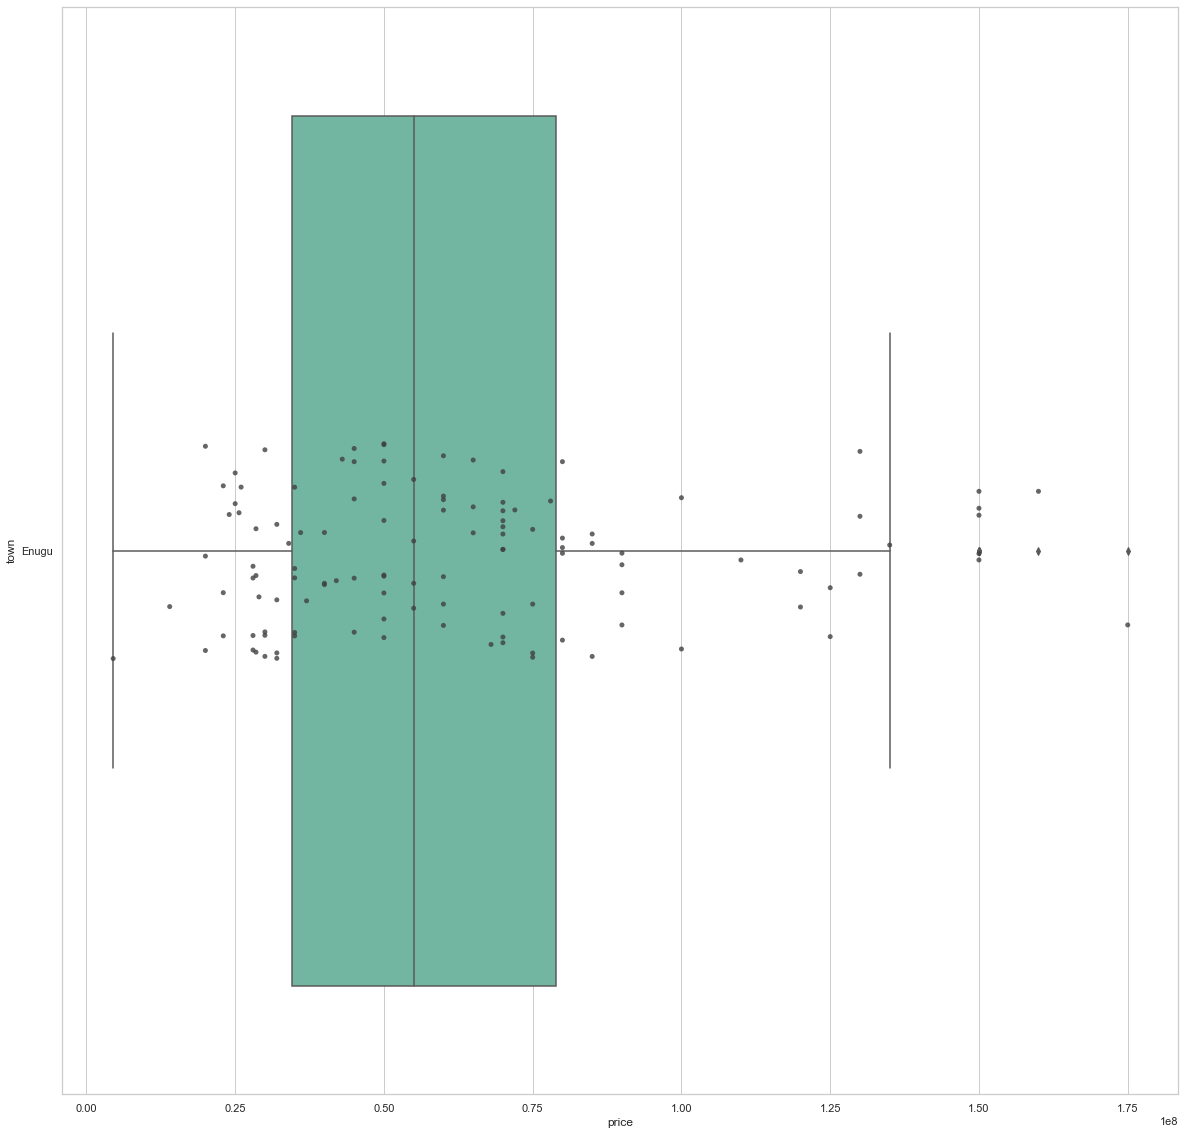

In [155]:
# Plotting a boxplot to validate the changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_enu_outlier_free["price"],
            y=df_enu_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_enu_outlier_free["price"],
              y=df_enu_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### ENUGU REAL ESTATE MARKET TREND (Data Analysis)

#### Distribution of Features of Properties in Enugu

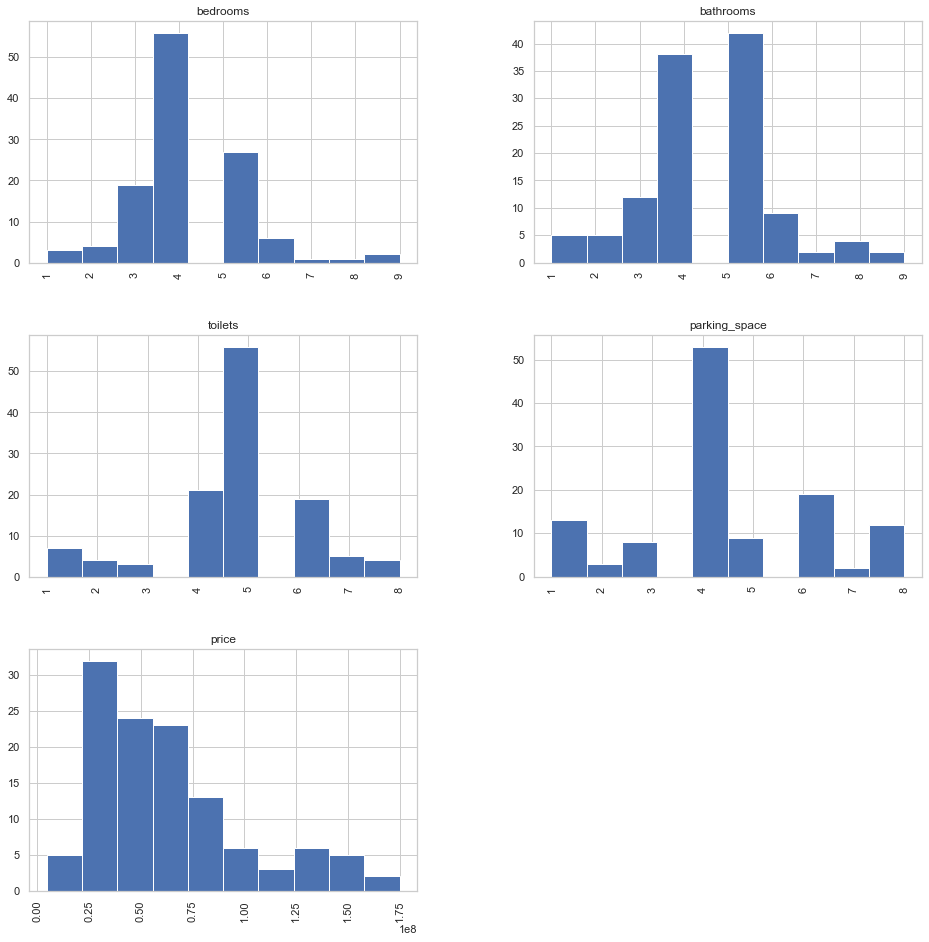

In [156]:
# Plotting histogram

df_enu_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Enugu

In [157]:
enu_average_price = st.mean(df_enu_outlier_free["price"])

print("The average property price in Enugu is " +
      str(round(enu_average_price, 2)) + " Naira")

The average property price in Enugu is 63089495.8 Naira


### Most Common Property Type

In [158]:
enu_most_common = st.mode(df_enu_outlier_free["title"])

print("The most common property type in Enugu State is " +
      str(enu_most_common))

The most common property type in Enugu State is Detached Duplex


### IMO

In [159]:
# Selecting data on only Imo

df_imo = df[df["state"] == "Imo"].reset_index(drop=True)
df_imo.head(5)

bedrooms  bathrooms  toilets  parking_space                 title  \
0         5          3        3              4       Detached Duplex   
1         5          5        6              5  Semi Detached Duplex   
2         4          5        5              4        Block of Flats   
3         4          5        5              4        Block of Flats   
4         2          5        5              4        Block of Flats   

               town state        price  
0      Owerri North   Imo   50000000.0  
1  Owerri Municipal   Imo   60000000.0  
2  Owerri Municipal   Imo  130000000.0  
3       Owerri West   Imo  150000000.0  
4       Owerri West   Imo   60000000.0

In [160]:
df_imo.shape
print(f"The new dataframe has", df_imo.shape[0],
      "rows and", df_imo.shape[1], "columns.")

The new dataframe has 229 rows and 8 columns.


In [161]:
df_imo.describe()

bedrooms   bathrooms     toilets  parking_space         price
count  229.000000  229.000000  229.000000     229.000000  2.290000e+02
mean     3.991266    4.135371    4.484716       4.427948  7.414629e+07
std      1.716768    1.740644    1.888558       1.777122  6.048017e+07
min      1.000000    1.000000    1.000000       1.000000  5.850000e+06
25%      3.000000    3.000000    3.000000       4.000000  3.500000e+07
50%      4.000000    5.000000    5.000000       4.000000  5.500000e+07
75%      5.000000    5.000000    6.000000       5.000000  8.500000e+07
max      9.000000    9.000000    9.000000       9.000000  3.000000e+08

In [162]:
# Summarize the categorical features

df_imo.describe(include=["object"])

title              town state
count               229               229   229
unique                7                 4     1
top     Detached Duplex  Owerri Municipal   Imo
freq                107               194   229

### Towns in Imo

In [163]:
df_imo["town"].unique()

array(['Owerri North', 'Owerri Municipal', 'Owerri West', 'Ohaji/Egbema'],
      dtype=object)

### Property Types

In [164]:
df_imo["title"].unique()

array(['Detached Duplex', 'Semi Detached Duplex', 'Block of Flats',
       'Detached Bungalow', 'Semi Detached Bungalow', 'Terraced Bungalow',
       'Terraced Duplexes'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

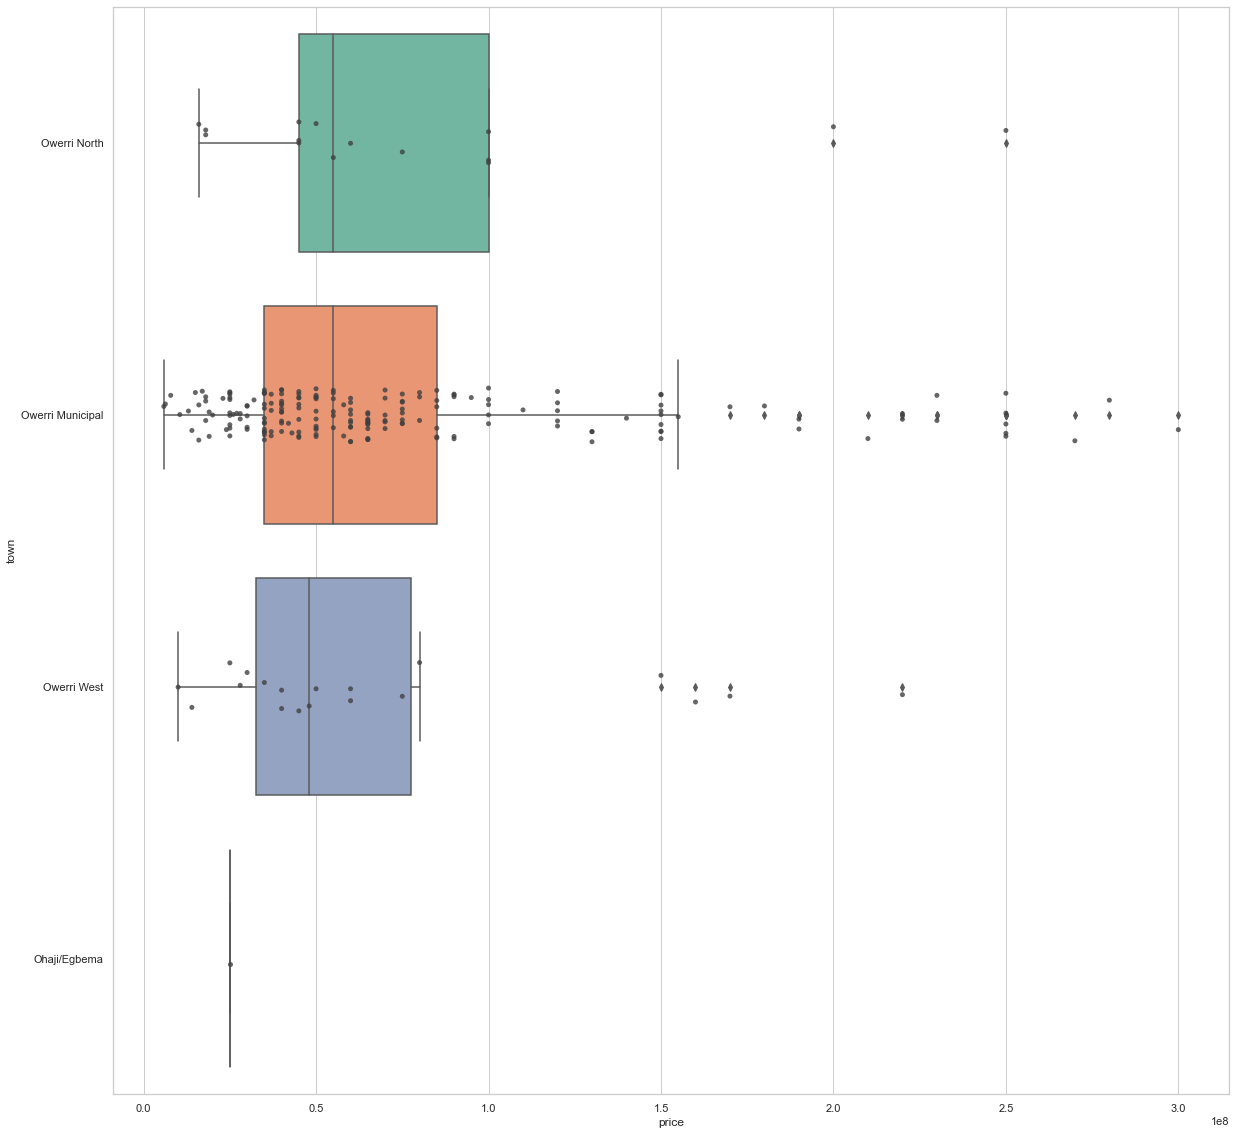

In [165]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_imo["price"], y=df_imo["town"],  palette="Set2",)
sns.stripplot(x=df_imo["price"], y=df_imo["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [166]:
# Calculating q1 and q3 for price

imo_Q1 = df_imo.price.quantile(0.25)
imo_Q3 = df_imo.price.quantile(0.75)
imo_Q1, imo_Q3

(35000000.0, 85000000.0)

In [167]:
# Calculating InterQuantileRange (IQR) for price
imo_IQR = imo_Q3 - imo_Q1

print("The Interquartile Range for the price is", imo_IQR)

The Interquartile Range for the price is 50000000.0


In [168]:
# Lower and Upper Limit

imo_lower_limit = Q1 - 1.5*imo_IQR
imo_upper_limit = Q3 + 1.5*imo_IQR
imo_lower_limit, imo_upper_limit

(-37000000.0, 235000000.0)

In [169]:
# Identifying the Outliers

imo_price_outliers = df_imo[(df_imo.price < imo_lower_limit)
                            | (df_imo.price > imo_upper_limit)]

imo_price_outliers.shape

(9, 8)

### Removing the Outliers

In [170]:
# Check the shape before removing the outliers

Imo = df_imo.shape
Imo

(229, 8)

In [171]:
# Remove the outliers using the IQR

df_imo_outlier_free = df_imo[(df_imo.price > imo_lower_limit)
                             & (df_imo.price < imo_upper_limit)]
df_imo_outlier_free.shape

(220, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

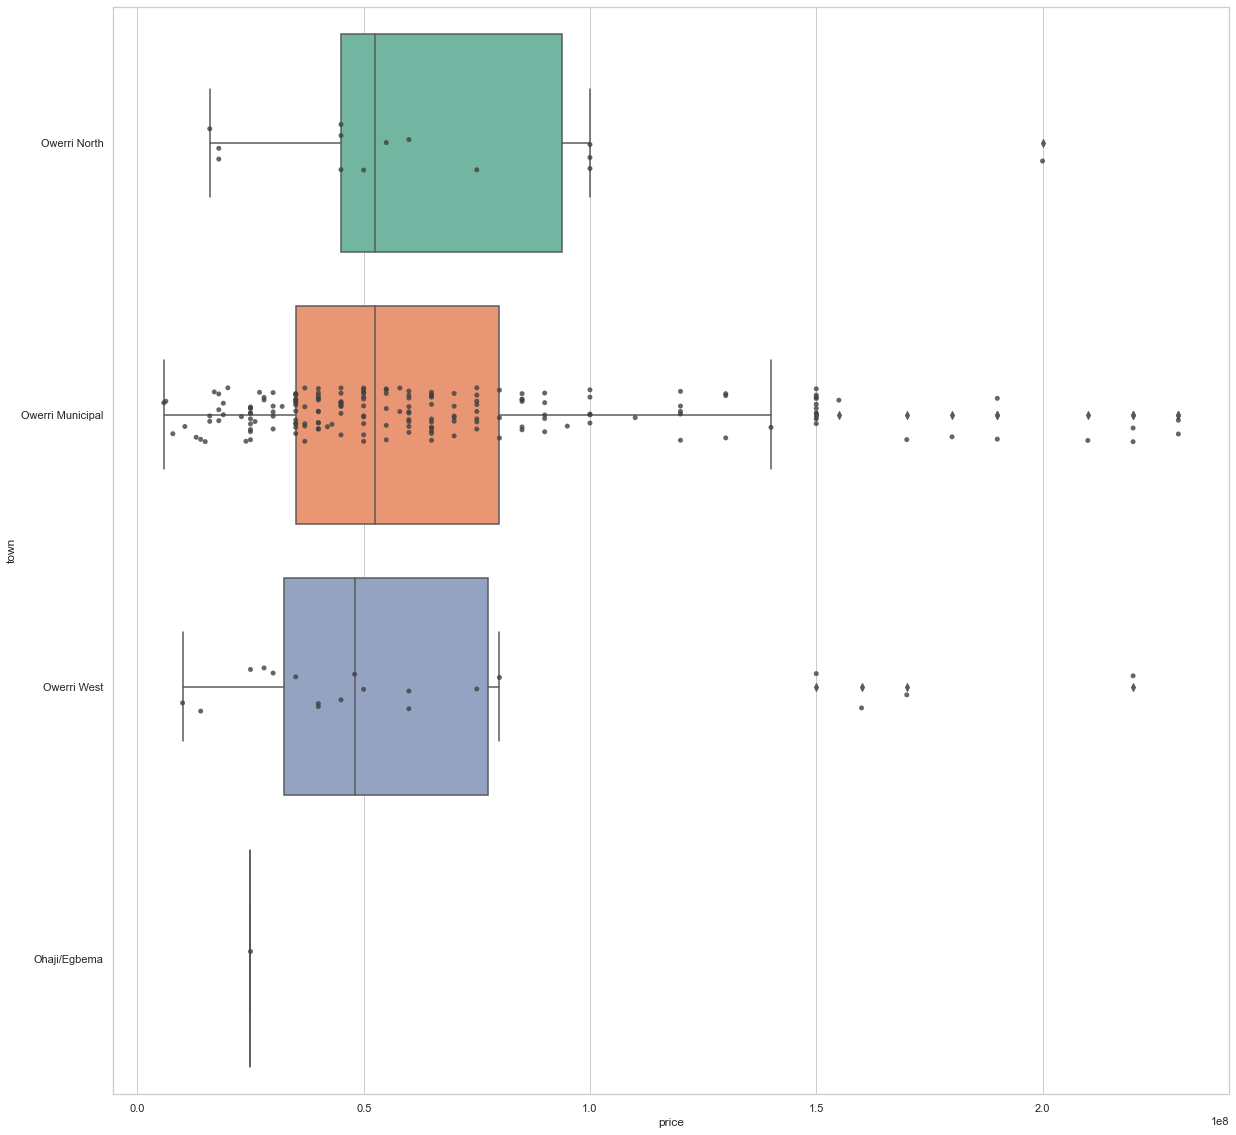

In [172]:
# Plotting a boxplot to validate the changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_imo_outlier_free["price"],
            y=df_imo_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_imo_outlier_free["price"],
              y=df_imo_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### IMO REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Imo

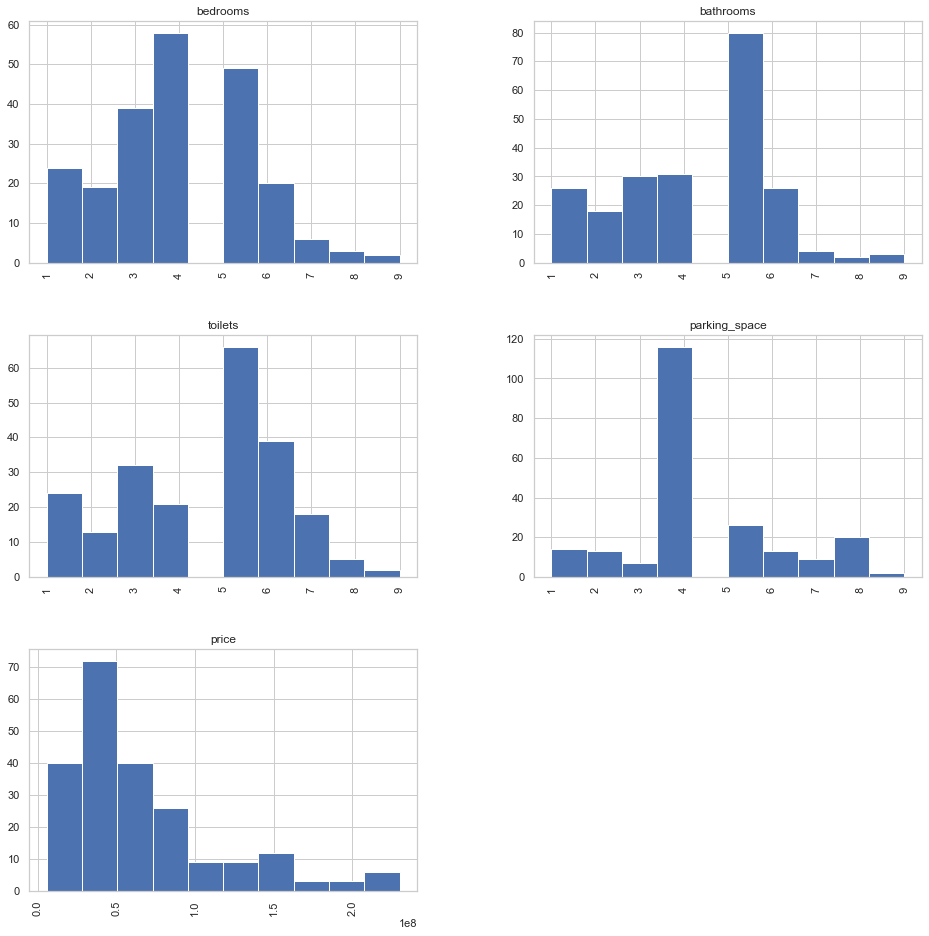

In [173]:
# Plotting histogram

df_imo_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Imo

In [174]:
imo_average_price = st.mean(df_imo_outlier_free["price"])

print("The average property price in Imo is " +
      str(round(imo_average_price, 2)) + " Naira")

The average property price in Imo is 66497727.27 Naira


#### Visualise

In [175]:
# Plotting a bar chart

imo_average_price = df_imo_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_imo_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=imo_average_price,
                   color=df_imo_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Imo State")
fig.show()

#### Owerri West appears to be the most expensive town to live in Imo State.

### Most Common Property Type

In [176]:
imo_most_common = st.mode(df_imo_outlier_free["title"])

print("The most common property type in Imo State is " +
      str(imo_most_common))

The most common property type in Imo State is Detached Duplex


## LAGOS STATE

In [177]:
# Selecting data on only Lagos

df_lag = df[df["state"] == "Lagos"].reset_index(drop=True)
df_lag.head(3)

bedrooms  bathrooms  toilets  parking_space                 title   town  \
0         4          5        5              4       Detached Duplex  Lekki   
1         4          4        5              6       Detached Duplex   Ajah   
2         4          4        5              2  Semi Detached Duplex  Lekki   

   state        price  
0  Lagos  120000000.0  
1  Lagos   40000000.0  
2  Lagos   75000000.0

In [178]:
df_lag.shape
print(f"The new dataframe has", df_lag.shape[0],
      "rows and", df_lag.shape[1], "columns.")

The new dataframe has 8571 rows and 8 columns.


In [179]:
df_lag.describe()

bedrooms    bathrooms      toilets  parking_space         price
count  8571.000000  8571.000000  8571.000000    8571.000000  8.571000e+03
mean      4.220978     4.550928     5.075954       4.065453  5.444214e+08
std       1.246955     1.306144     1.374019       1.603682  2.053316e+10
min       1.000000     1.000000     1.000000       1.000000  9.000000e+04
25%       3.000000     4.000000     4.000000       3.000000  4.500000e+07
50%       4.000000     5.000000     5.000000       4.000000  8.200000e+07
75%       5.000000     5.000000     6.000000       5.000000  1.775000e+08
max       9.000000     9.000000     9.000000       9.000000  1.800000e+12

### Categorical features

In [180]:
# Summarize the categorical features

df_lag.describe(include=["object"])

title   town  state
count              8571   8571   8571
unique                7     48      1
top     Detached Duplex  Lekki  Lagos
freq               4430   3392   8571

### Towns in Lagos

In [181]:
df_lag["town"].unique()

array(['Lekki', 'Ajah', 'Epe', 'Victoria Island (VI)', 'Ikeja', 'Ikoyi',
       'Magodo', 'Ibeju Lekki', 'Yaba', 'Ifako-Ijaiye', 'Agege',
       'Ikorodu', 'Isheri North', 'Isheri', 'Ipaja', 'Mushin', 'Ejigbo',
       'Isolo', 'Ojodu', 'Alimosho', 'Shomolu', 'Ogudu', 'Surulere',
       'Ayobo', 'Ikotun', 'Maryland', 'Gbagada', 'Idimu', 'Ojo', 'Kosofe',
       'Ilupeju', 'Ketu', 'Ojota', 'Oshodi', 'Amuwo Odofin', 'Ijede',
       'Agbara-Igbesa', 'Ijaiye', 'Apapa', 'Lagos Island', 'Badagry',
       'Oke-Odo', 'Egbe', 'Orile', 'Eko Atlantic City', 'Imota', 'Ijesha',
       'Ibeju'], dtype=object)

### Property Types

In [182]:
df_lag["title"].unique()

array(['Detached Duplex', 'Semi Detached Duplex', 'Detached Bungalow',
       'Terraced Duplexes', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

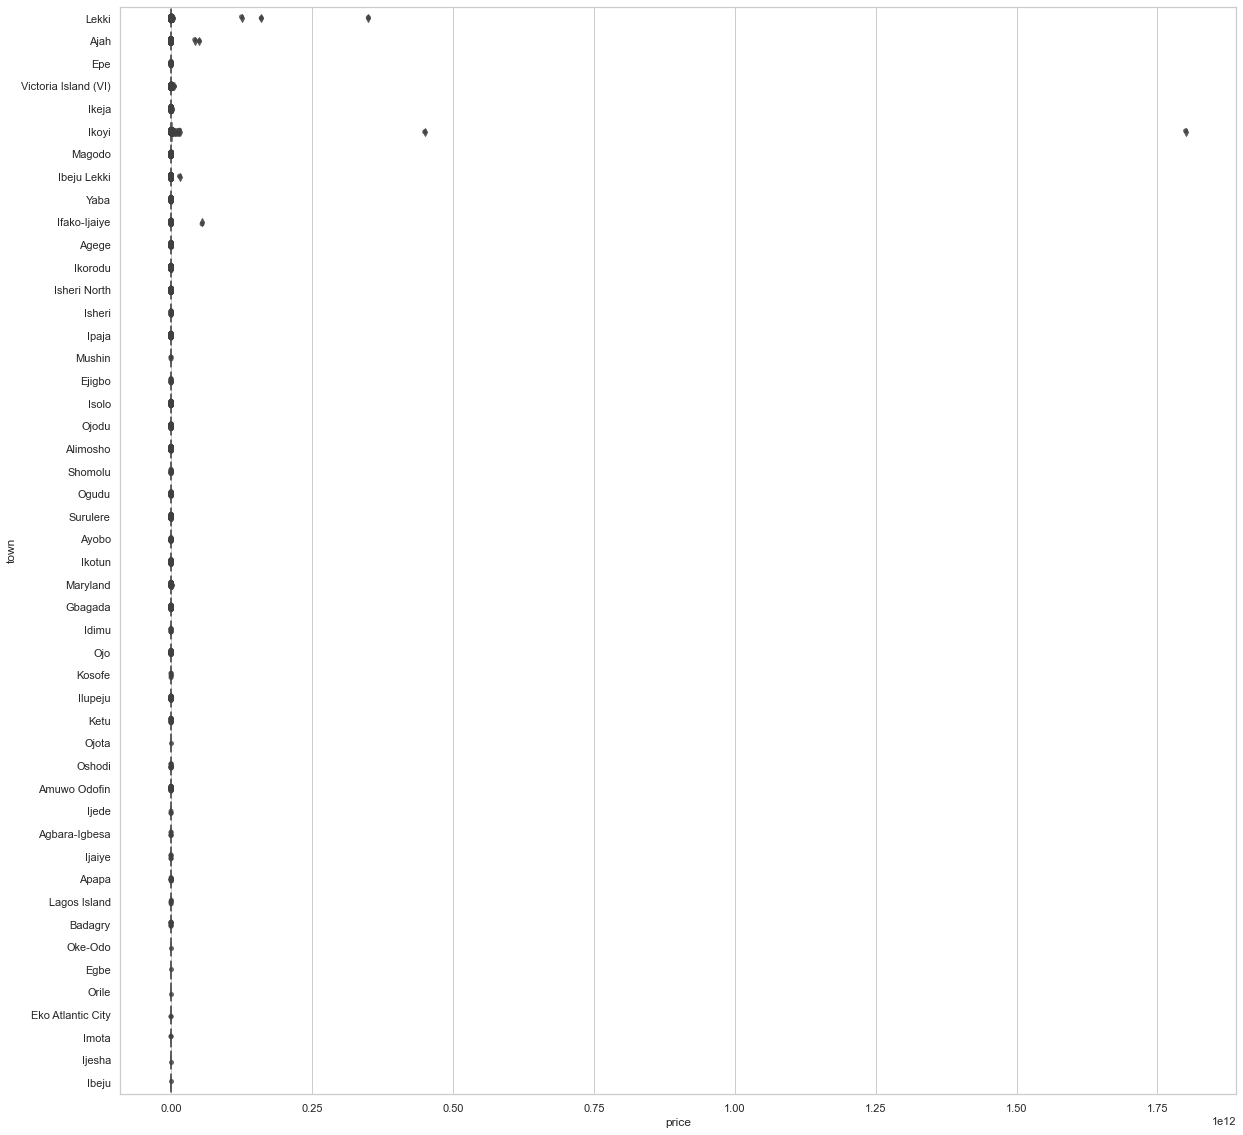

In [183]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_lag["price"], y=df_lag["town"],  palette="Set2",)
sns.stripplot(x=df_lag["price"], y=df_lag["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

#### The box plot above show majority of the dataoiints on the left side, however, there some datapoints on the that appear separated from the other datapoints as you begin to scan towards the right part of the chart. These point indicate the presence of Outliers. These outliers are properties with significantly higher prices when compared to the property prices within Lagos State. The "lekki" and "Ikoyi" appear to have more of these outliers. 

### InterQuantileRange (IQR)

In [184]:
# Calculating q1 and q3 for price
lag_Q1 = df_lag.price.quantile(0.25)
lag_Q3 = df_lag.price.quantile(0.75)
lag_Q1, lag_Q3

(45000000.0, 177500000.0)

In [185]:
# Calculating InterQuantileRange (IQR) for price
lag_IQR = lag_Q3 - lag_Q1

print("The Interquartile Range for the price is", lag_IQR)

The Interquartile Range for the price is 132500000.0


In [186]:
# Lower and Upper Limit

lag_lower_limit = Q1 - 1.5*lag_IQR
lag_upper_limit = Q3 + 1.5*lag_IQR
lag_lower_limit, lag_upper_limit

(-160750000.0, 358750000.0)

### Identifying the Outliers

In [187]:
lag_price_outliers = df_lag[(df_lag.price < lag_lower_limit)
                            | (df_lag.price > lag_upper_limit)]

lag_price_outliers.shape

(917, 8)

### Removing the Outliers

#### Check the shape before removing the outliers

In [188]:
Lagos = df_lag.shape
Lagos

(8571, 8)

#### Remove the outliers using the IQR

In [189]:
df_lag_outlier_free = df_lag[(df_lag.price > lag_lower_limit)
                             & (df_lag.price < lag_upper_limit)]
df_lag_outlier_free.shape

(7654, 8)

#### Visualise to validate changes 

<AxesSubplot:xlabel='price', ylabel='town'>

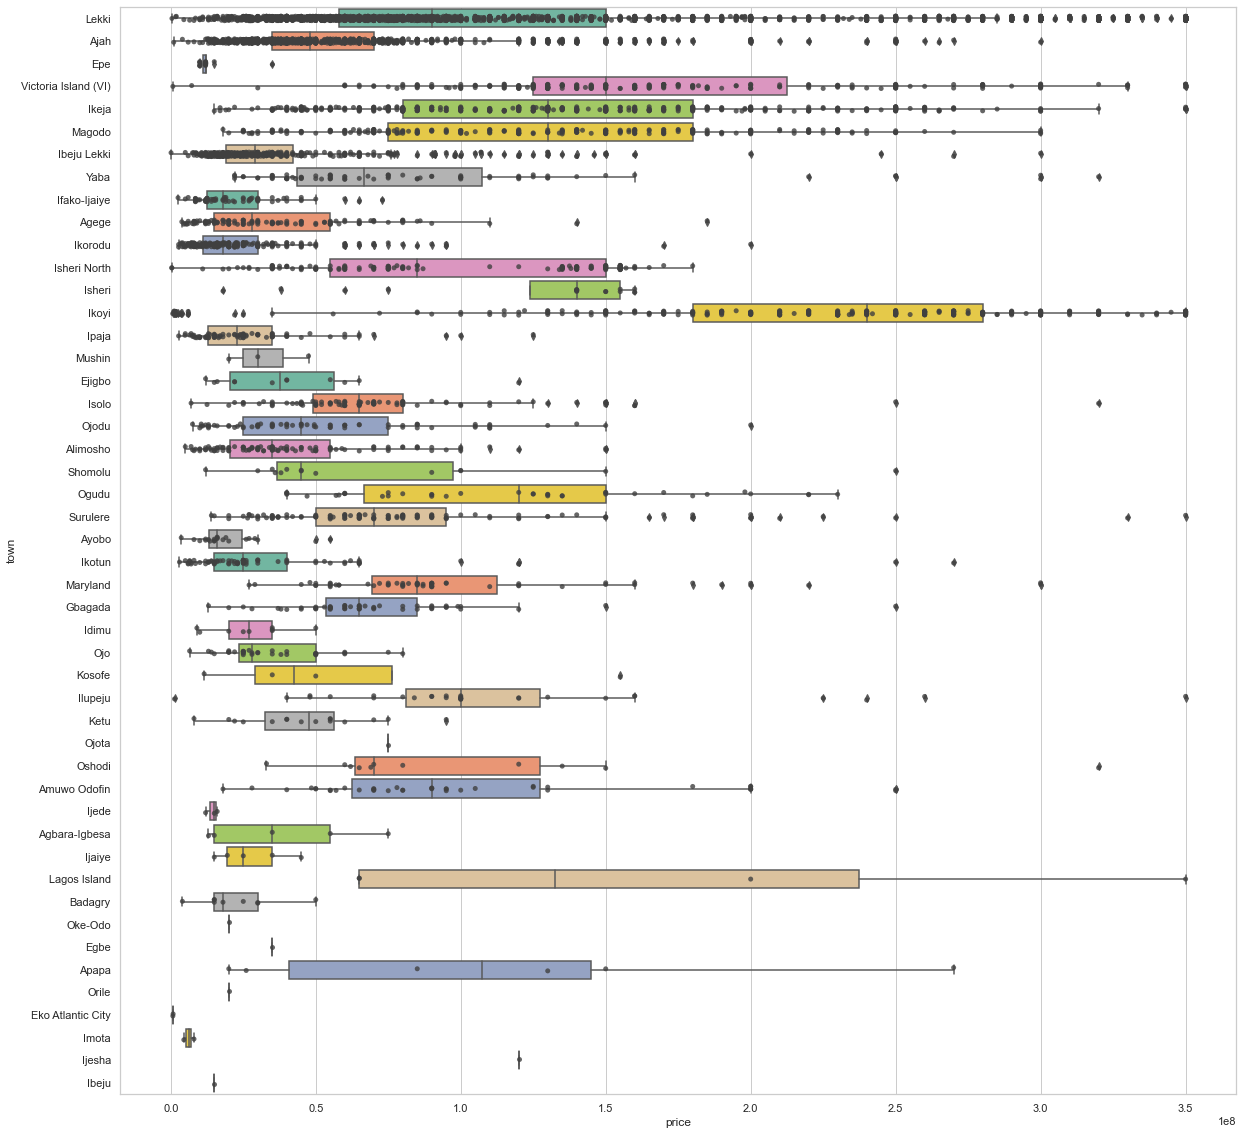

In [190]:
# Plotting a boxplot to validate changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_lag_outlier_free["price"],
            y=df_lag_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_lag_outlier_free["price"],
              y=df_lag_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

#### Re-plotting the box plot indicates the absence of the outliers initially spotted. However, this chart reveals that certain towns such as "IKoyi", "Lekki", "Victoria Island", "Magodo", "Apapa", "Ikeja" and "Lagos Island" have properties with significantly higher prices than other towns within Lagos.

### LAGOS REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Lagos

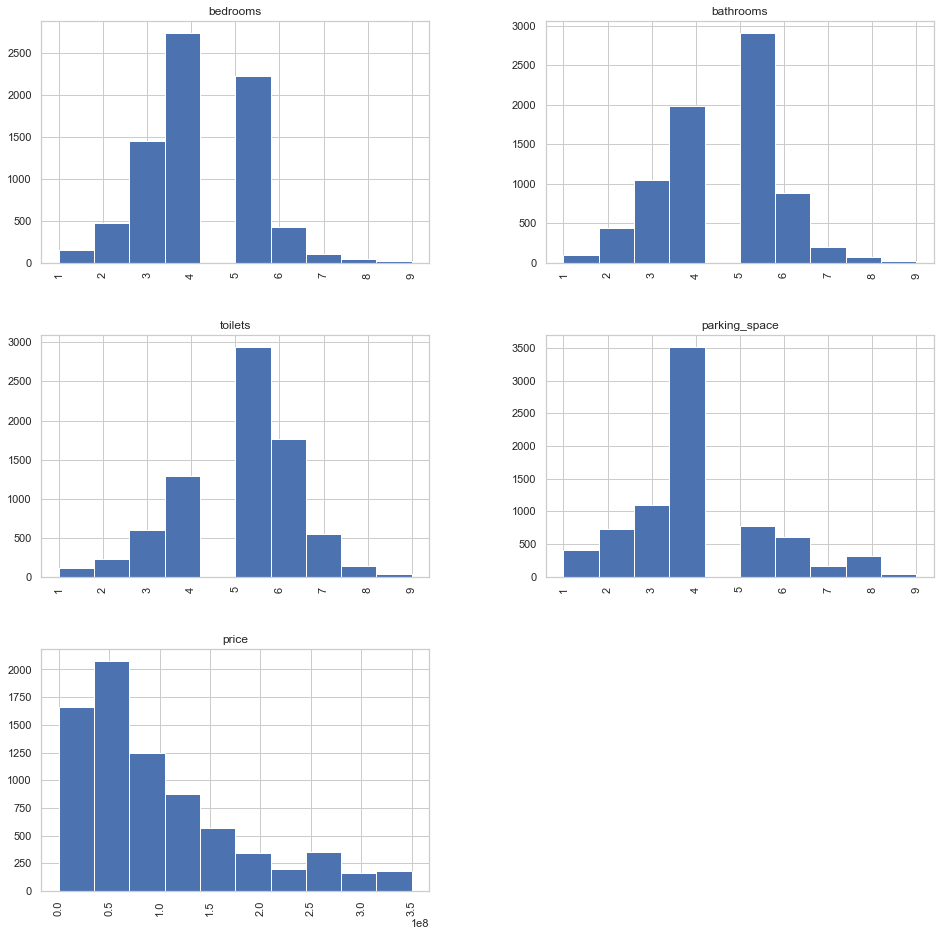

In [191]:
# Plotting histogram

df_lag_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Lagos

In [192]:
average_price_lag = st.mean(df_lag_outlier_free["price"])

print("The average property price in Lagos is " +
      str(round(average_price_lag, 2)) + " Naira")

The average property price in Lagos is 100034223.99 Naira


### Visualise

In [193]:
# Plotting a bar chart of average price per town

average_price_lag = df_lag_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_lag_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=average_price_lag,
                   color=df_lag_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Lagos State")
fig.show()

#### Ikoyi, Victoria Island (VI) and Lekki appear to be the most expensive towns to live in Lagos State.

### Most Common Property Type

In [194]:
lag_most_common = st.mode(df_lag_outlier_free["title"])

print("The most common property type in Lagos State is " +
      str(lag_most_common))

The most common property type in Lagos State is Detached Duplex


#### Write a conclusion

### OGUN

In [195]:
# Selecting data on only Ogun

df_ogu = df[df["state"] == "Ogun"].reset_index(drop=True)
df_ogu.head(5)

bedrooms  bathrooms  toilets  parking_space              title  \
0         3          4        4              3  Detached Bungalow   
1         2          3        5              4     Block of Flats   
2         2          2        2              4  Detached Bungalow   
3         1          2        2              1     Block of Flats   
4         4          2        2              1  Terraced Bungalow   

             town state       price  
0      Mowe Ofada  Ogun  12000000.0  
1      Mowe Ofada  Ogun   7000000.0  
2  Abeokuta North  Ogun   4000000.0  
3       Sango Ota  Ogun   6900000.0  
4       Sango Ota  Ogun   5000000.0

In [196]:
df_ogu.shape
print(f"The new dataframe has", df_ogu.shape[0],
      "rows and", df_ogu.shape[1], "columns.")

The new dataframe has 579 rows and 8 columns.


In [197]:
df_ogu.describe()

bedrooms   bathrooms     toilets  parking_space         price
count  579.000000  579.000000  579.000000     579.000000  5.790000e+02
mean     3.345423    3.758204    4.108808       3.803109  2.411517e+07
std      1.297399    1.341479    1.387129       1.528028  2.289475e+07
min      1.000000    1.000000    1.000000       1.000000  1.000000e+05
25%      3.000000    3.000000    3.000000       3.000000  1.000000e+07
50%      3.000000    4.000000    4.000000       4.000000  1.600000e+07
75%      4.000000    5.000000    5.000000       4.000000  3.000000e+07
max      9.000000    9.000000    9.000000       9.000000  1.550000e+08

### Categorical features

In [198]:
# Summarize the categorical features

df_ogu.describe(include=["object"])

title        town state
count                 579         579   579
unique                  7          22     1
top     Detached Bungalow  Mowe Ofada  Ogun
freq                  225         137   579

### Towns in Ogun State

In [199]:
df_ogu["town"].unique()

array(['Mowe Ofada', 'Abeokuta North', 'Sango Ota', 'Ifo', 'Ado-Odo/Ota',
       'Isheri North', 'Sagamu', 'Ibafo', 'Mowe Town', 'Simawa', 'Arepo',
       'Abeokuta South', 'KM 46', 'Magboro', 'Obafemi Owode', 'Ogijo',
       'Ijoko', 'Oke-Aro', 'Yewa South', 'Agbara', 'Ijebu Ode', 'Ewekoro'],
      dtype=object)

### Property Types

In [200]:
df_ogu["title"].unique()

array(['Detached Bungalow', 'Block of Flats', 'Terraced Bungalow',
       'Detached Duplex', 'Terraced Duplexes', 'Semi Detached Bungalow',
       'Semi Detached Duplex'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

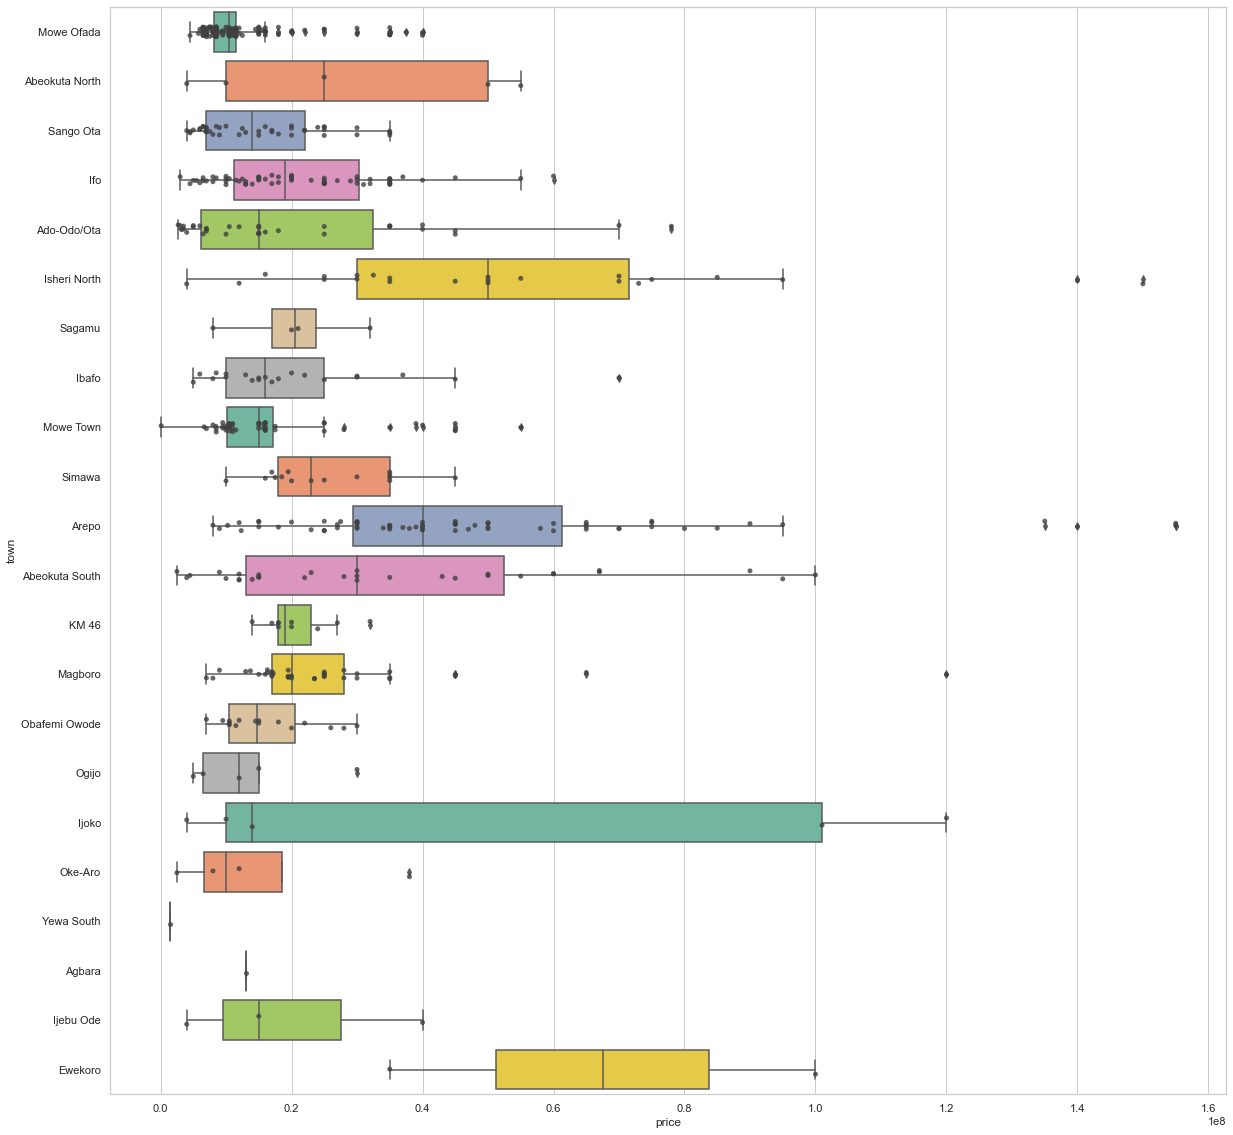

In [201]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_ogu["price"], y=df_ogu["town"],  palette="Set2",)
sns.stripplot(x=df_ogu["price"], y=df_ogu["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [202]:
# Calculating q1 and q3 for price
ogu_Q1 = df_ogu.price.quantile(0.25)
ogu_Q3 = df_ogu.price.quantile(0.75)
ogu_Q1, ogu_Q3

(10000000.0, 30000000.0)

In [203]:
# Calculating InterQuantileRange (IQR) for price

ogu_IQR = ogu_Q3 - ogu_Q1

print("The Interquartile Range for the price is", ogu_IQR)

The Interquartile Range for the price is 20000000.0


In [204]:
# Lower and Upper Limit

ogu_lower_limit = Q1 - 1.5*ogu_IQR
ogu_upper_limit = Q3 + 1.5*ogu_IQR
ogu_lower_limit, ogu_upper_limit

(8000000.0, 190000000.0)

In [205]:
# Identifying the Outliers

ogu_price_outliers = df_ogu[(df_ogu.price < ogu_lower_limit)
                            | (df_ogu.price > ogu_upper_limit)]

ogu_price_outliers.shape

(82, 8)

### Removing the Outliers

In [206]:
# Check the shape before removing the outliers

Ogun = df_ogu.shape
Ogun

(579, 8)

In [207]:
# Remove the outliers using the IQR

df_ogu_outlier_free = df_ogu[(df_ogu.price > ogu_lower_limit)
                             & (df_ogu.price < ogu_upper_limit)]
df_ogu_outlier_free.shape

(484, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

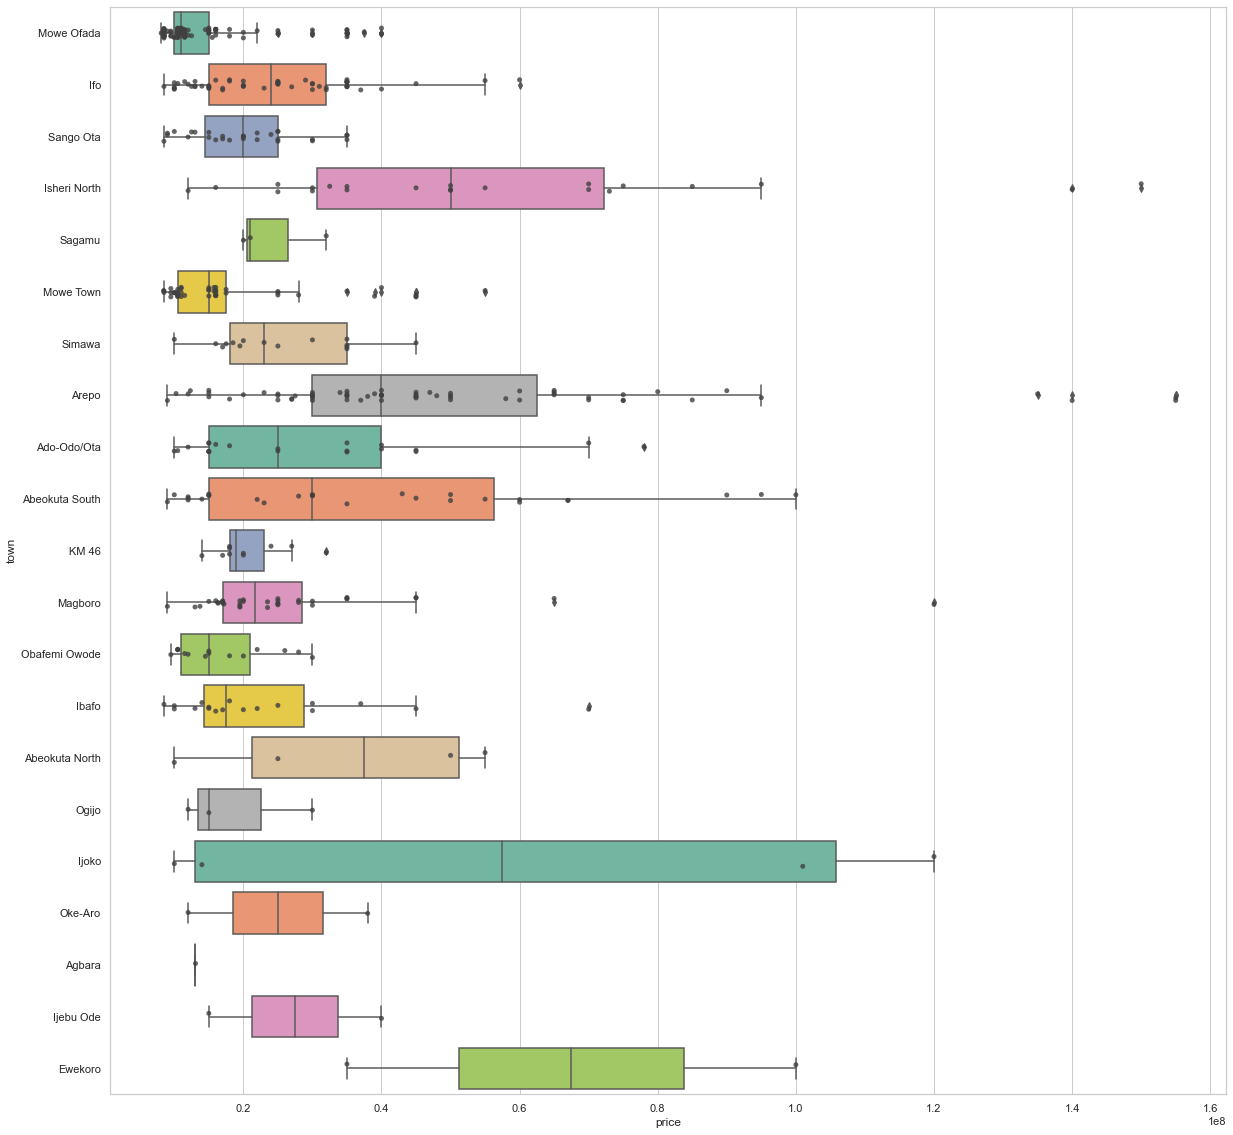

In [208]:
# Plotting a boxplot to validate changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_ogu_outlier_free["price"],
            y=df_ogu_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_ogu_outlier_free["price"],
              y=df_ogu_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### OGUN REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Ogun

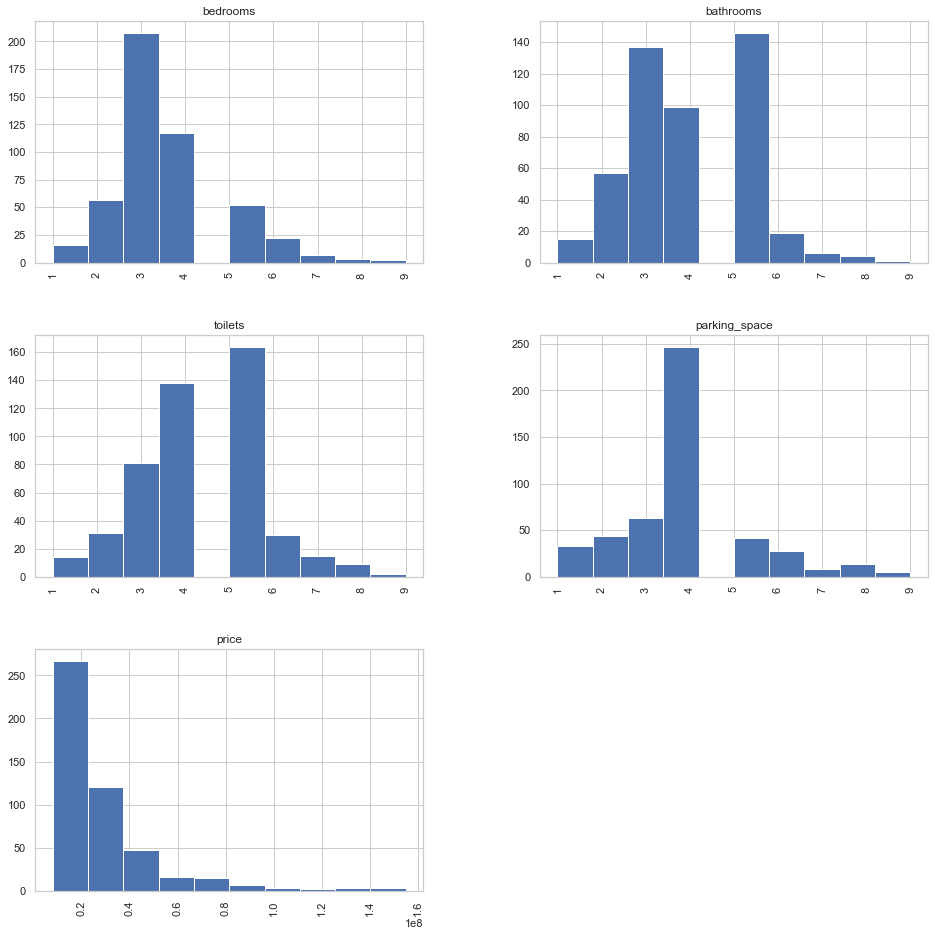

In [209]:
# Plotting histogram

df_ogu_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Ogun

In [210]:
ogu_average_price = st.mean(df_ogu_outlier_free["price"])

print("The average property price in Ogun is " +
      str(round(ogu_average_price, 2)) + " Naira")

The average property price in Ogun is 27662570.25 Naira


In [211]:
# Visualise

# Plotting a bar chart

ogu_average_price = df_ogu_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_ogu_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=ogu_average_price,
                   color=df_ogu_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Ogun State")
fig.show()

#### Ewekoro, Ijoko, and Isheri North appear to be the most expensive towns to live in Ogun State.

### Most Common Property Type

In [212]:
ogu_most_common = st.mode(df_ogu_outlier_free["title"])

print("The most common property type in Ogun State is " +
      str(ogu_most_common))

The most common property type in Ogun State is Detached Bungalow


### OYO STATE

In [213]:
# Selecting data on only Oyo

df_oyo = df[df["state"] == "Oyo"].reset_index(drop=True)
df_oyo.head(5)

bedrooms  bathrooms  toilets  parking_space              title    town  \
0         3          3        3              4  Detached Bungalow  Ibadan   
1         8          1        1              4    Detached Duplex  Ibadan   
2         3          2        2              4  Detached Bungalow  Ibadan   
3         3          3        3              4  Detached Bungalow  Ibadan   
4         2          2        3              4  Detached Bungalow  Egbeda   

  state        price  
0   Oyo   10000000.0  
1   Oyo  150000000.0  
2   Oyo   11000000.0  
3   Oyo   18000000.0  
4   Oyo    3000000.0

In [214]:
df_oyo.shape
print(f"The new dataframe has", df_oyo.shape[0],
      "rows and", df_oyo.shape[1], "columns.")

The new dataframe has 435 rows and 8 columns.


In [215]:
df_oyo.describe()

bedrooms   bathrooms     toilets  parking_space         price
count  435.000000  435.000000  435.000000     435.000000  4.350000e+02
mean     3.951724    4.190805    4.381609       4.156322  4.383931e+07
std      1.470122    1.591425    1.646567       1.336625  4.419087e+07
min      1.000000    1.000000    1.000000       1.000000  1.400000e+06
25%      3.000000    3.000000    3.000000       4.000000  1.500000e+07
50%      4.000000    4.000000    5.000000       4.000000  3.100000e+07
75%      5.000000    5.000000    5.000000       4.000000  6.000000e+07
max      9.000000    9.000000    9.000000       8.000000  3.500000e+08

### Categorical features

In [216]:
# Summarize the categorical features

df_oyo.describe(include=["object"])

title    town state
count                 435     435   435
unique                  7      12     1
top     Detached Bungalow  Ibadan   Oyo
freq                  151     370   435

### Towns in Oyo

In [217]:
df_oyo["town"].unique()

array(['Ibadan', 'Egbeda', 'Ibadan South-West', 'Oluyole', 'Ido',
       'Afijio', 'Ibadan North', 'Ibarapa North', 'Akinyele',
       'Ibadan North-East', 'Oyo West', 'Ibadan North-West'], dtype=object)

### Property Types

In [218]:
df_oyo["title"].unique()

array(['Detached Bungalow', 'Detached Duplex', 'Block of Flats',
       'Semi Detached Duplex', 'Terraced Bungalow', 'Terraced Duplexes',
       'Semi Detached Bungalow'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

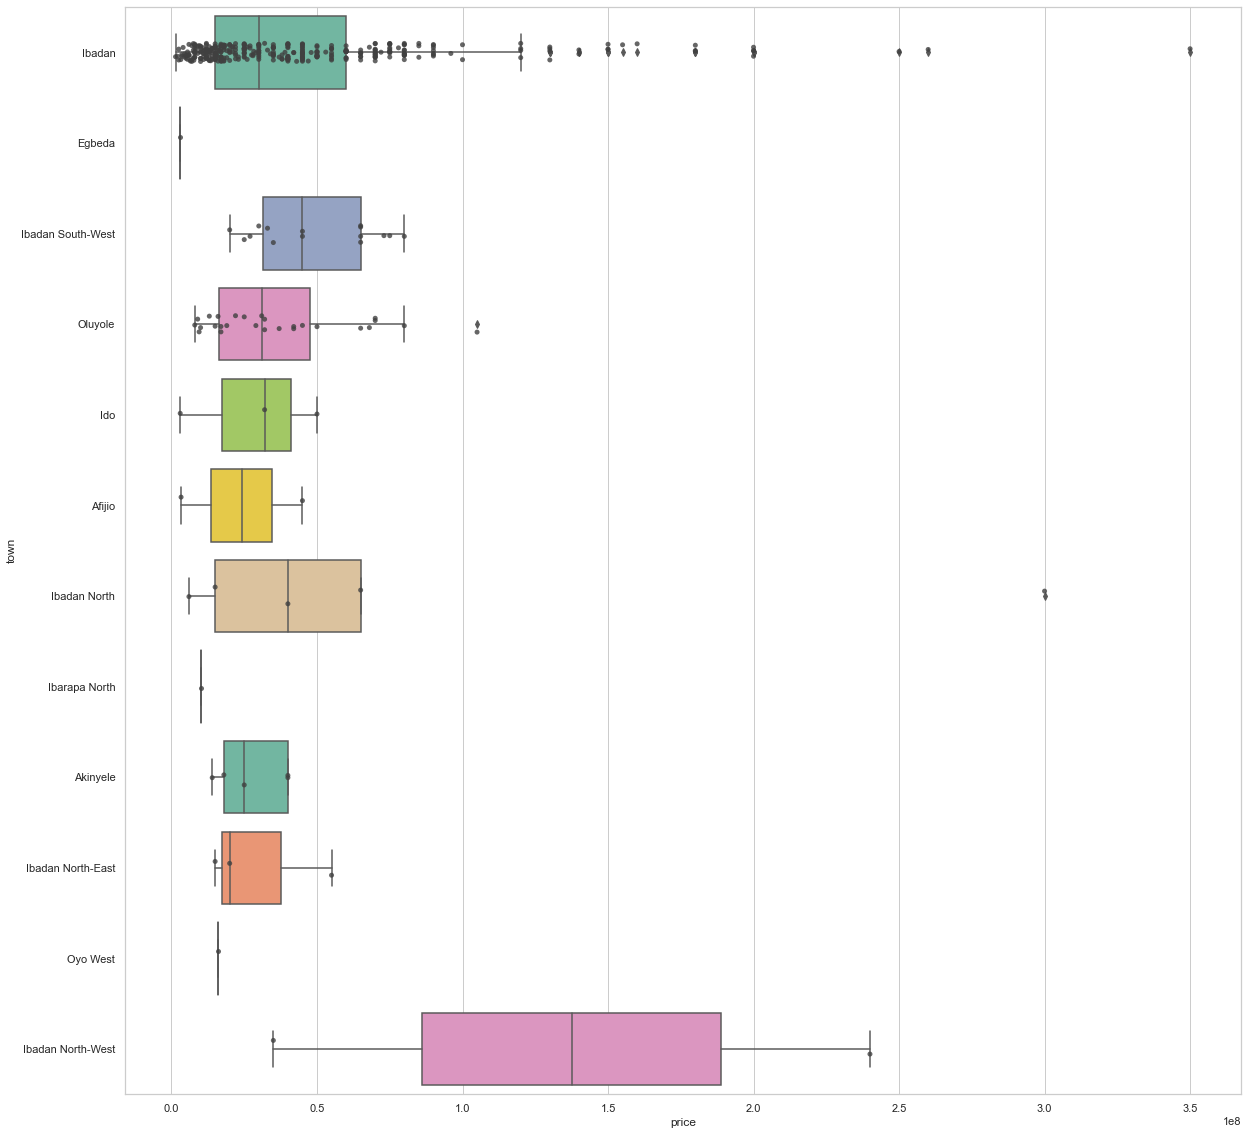

In [219]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_oyo["price"], y=df_oyo["town"],  palette="Set2",)
sns.stripplot(x=df_oyo["price"], y=df_oyo["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [220]:
# Calculating q1 and q3 for price
oyo_Q1 = df_oyo.price.quantile(0.25)
oyo_Q3 = df_oyo.price.quantile(0.75)
oyo_Q1, oyo_Q3

(15000000.0, 60000000.0)

In [221]:
# Calculating InterQuantileRange (IQR) for price

oyo_IQR = oyo_Q3 - oyo_Q1

print("The Interquartile Range for the price is", oyo_IQR)

The Interquartile Range for the price is 45000000.0


In [222]:
# Lower and Upper Limit

oyo_lower_limit = Q1 - 1.5*oyo_IQR
oyo_upper_limit = Q3 + 1.5*oyo_IQR
oyo_lower_limit, oyo_upper_limit

(-29500000.0, 227500000.0)

In [223]:
# Identifying the Outliers

oyo_price_outliers = df_oyo[(df_oyo.price < oyo_lower_limit)
                            | (df_oyo.price > oyo_upper_limit)]

oyo_price_outliers.shape

(5, 8)

### Removing the Outliers

In [224]:
# Check the shape before removing the outliers
Oyo = df_oyo.shape
Oyo

(435, 8)

In [225]:
# Remove the outliers using the IQR

df_oyo_outlier_free = df_oyo[(df_oyo.price > oyo_lower_limit)
                             & (df_oyo.price < oyo_upper_limit)]
df_oyo_outlier_free.shape

(430, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

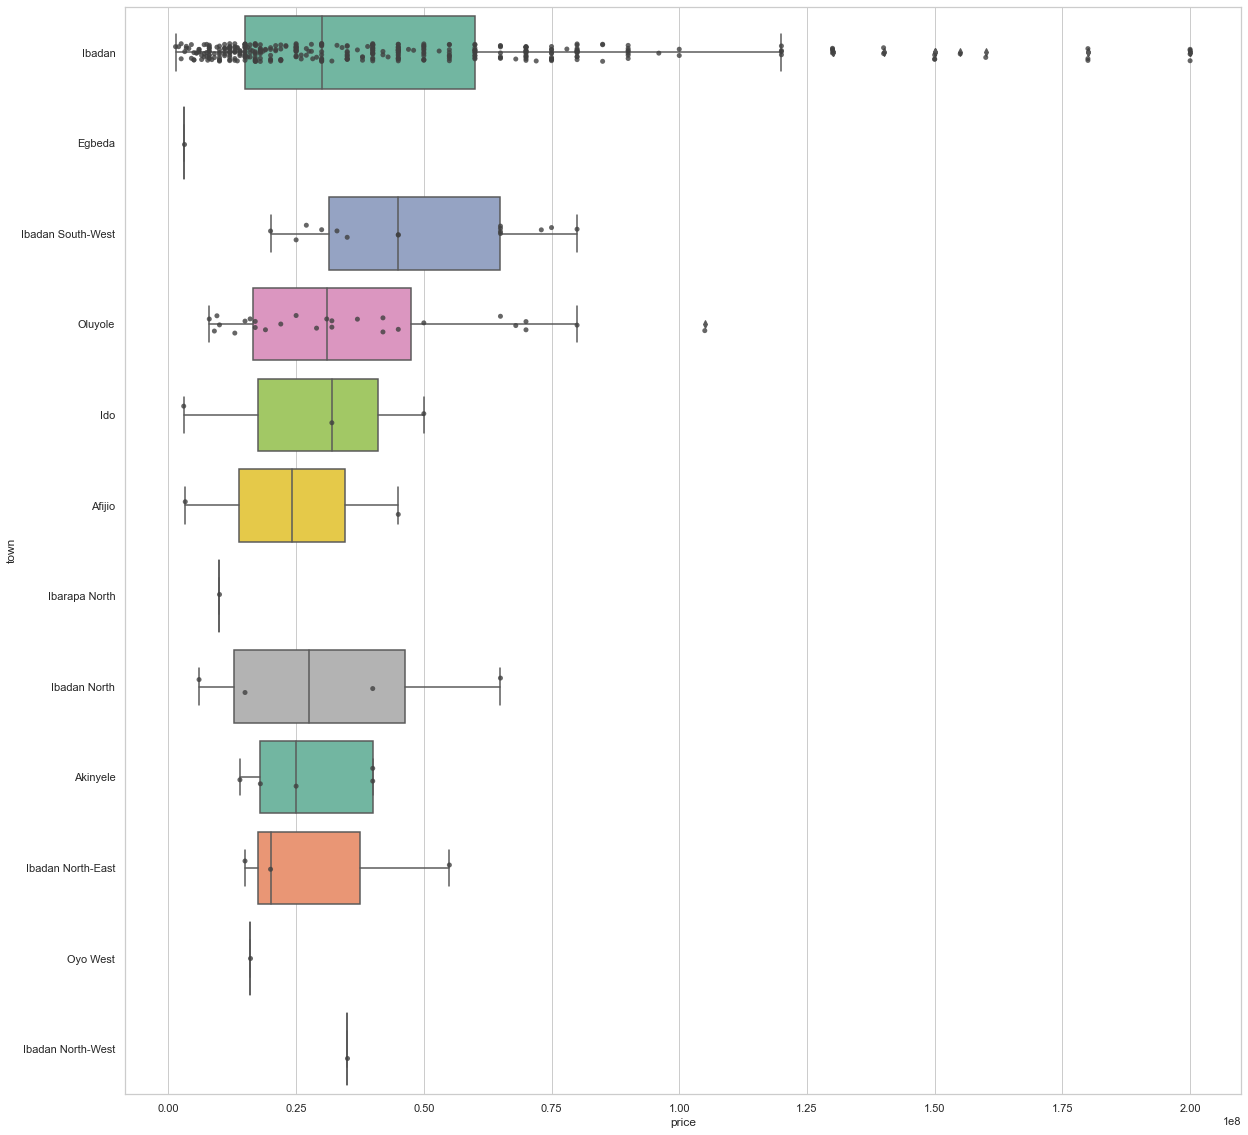

In [226]:
# Plotting a boxplot to validate the changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_oyo_outlier_free["price"],
            y=df_oyo_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_oyo_outlier_free["price"],
              y=df_oyo_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### OYO RESIDENTIAL REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Oyo

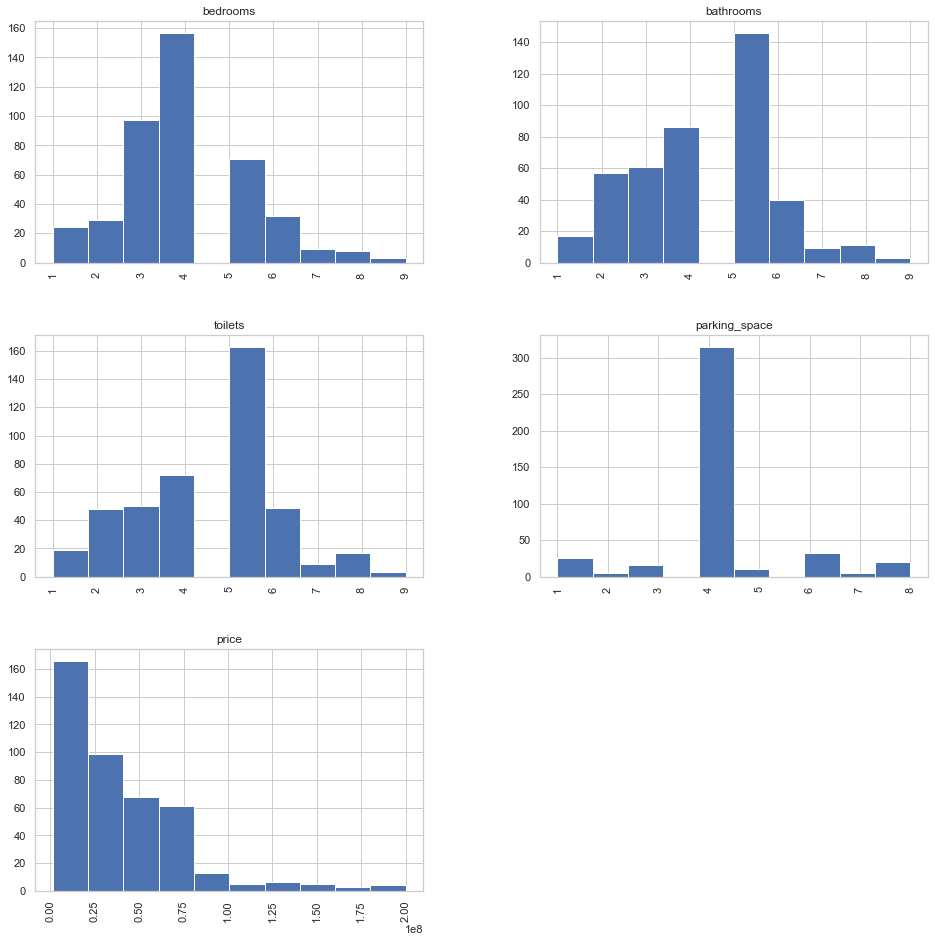

In [227]:
# Plotting histogram

df_oyo_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

#### Comment here 

### Average property price in Oyo

In [228]:
oyo_average_price = st.mean(df_oyo_outlier_free["price"])

print("The average property price in Oyo is " +
      str(round(oyo_average_price, 2)) + " Naira")

The average property price in Oyo is 41093255.81 Naira


In [229]:
# Visualise

# Plotting a bar chart

oyo_average_price = df_oyo_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_oyo_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=oyo_average_price,
                   color=df_oyo_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Oyo State")
fig.show()

#### Ibadan South-West, Ibadan and Oluyole appear to be the most expensive towns to live in Oyo State.

### Most Common Property Type

In [230]:
oyo_most_common = st.mode(df_oyo_outlier_free["title"])

print("The most common property type in Oyo State is " +
      str(oyo_most_common))

The most common property type in Oyo State is Detached Bungalow


### RIVERS STATE

In [231]:
# Selecting data on only Rivers

df_riv = df[df["state"] == "Rivers"].reset_index(drop=True)
df_riv.head(5)

bedrooms  bathrooms  toilets  parking_space                 title  \
0         4          5        5              4  Semi Detached Duplex   
1         4          5        5              5     Detached Bungalow   
2         4          4        5              1     Detached Bungalow   
3         3          5        5              4        Block of Flats   
4         5          5        6              5       Detached Duplex   

            town   state        price  
0  Port Harcourt  Rivers   85000000.0  
1  Port Harcourt  Rivers   32000000.0  
2  Port Harcourt  Rivers   30000000.0  
3     Obio-Akpor  Rivers  100000000.0  
4  Port Harcourt  Rivers  180000000.0

In [232]:
df_riv.shape
print(f"The new dataframe has", df_riv.shape[0],
      "rows and", df_riv.shape[1], "columns.")

The new dataframe has 422 rows and 8 columns.


In [233]:
df_riv.describe()

bedrooms   bathrooms     toilets  parking_space         price
count  422.000000  422.000000  422.000000     422.000000  4.220000e+02
mean     4.350711    4.713270    5.206161       4.739336  1.327626e+08
std      1.302377    1.338544    1.299611       2.268930  4.079943e+08
min      1.000000    1.000000    1.000000       1.000000  6.000000e+06
25%      4.000000    4.000000    5.000000       4.000000  3.586043e+07
50%      4.000000    5.000000    5.000000       4.000000  6.000000e+07
75%      5.000000    5.000000    6.000000       6.000000  1.000000e+08
max      9.000000    9.000000    9.000000       9.000000  4.000000e+09

### Categorical features

In [234]:
# Summarize the categorical features

df_riv.describe(include=["object"])

title           town   state
count               422            422     422
unique                7              5       1
top     Detached Duplex  Port Harcourt  Rivers
freq                233            410     422

### Towns in Rivers

In [235]:
df_riv["town"].unique()

array(['Port Harcourt', 'Obio-Akpor', 'Oyigbo', 'Eleme', 'Ikwerre'],
      dtype=object)

### Property Types

In [236]:
df_riv["title"].unique()

array(['Semi Detached Duplex', 'Detached Bungalow', 'Block of Flats',
       'Detached Duplex', 'Terraced Bungalow', 'Semi Detached Bungalow',
       'Terraced Duplexes'], dtype=object)

## Outliers

<AxesSubplot:xlabel='price', ylabel='town'>

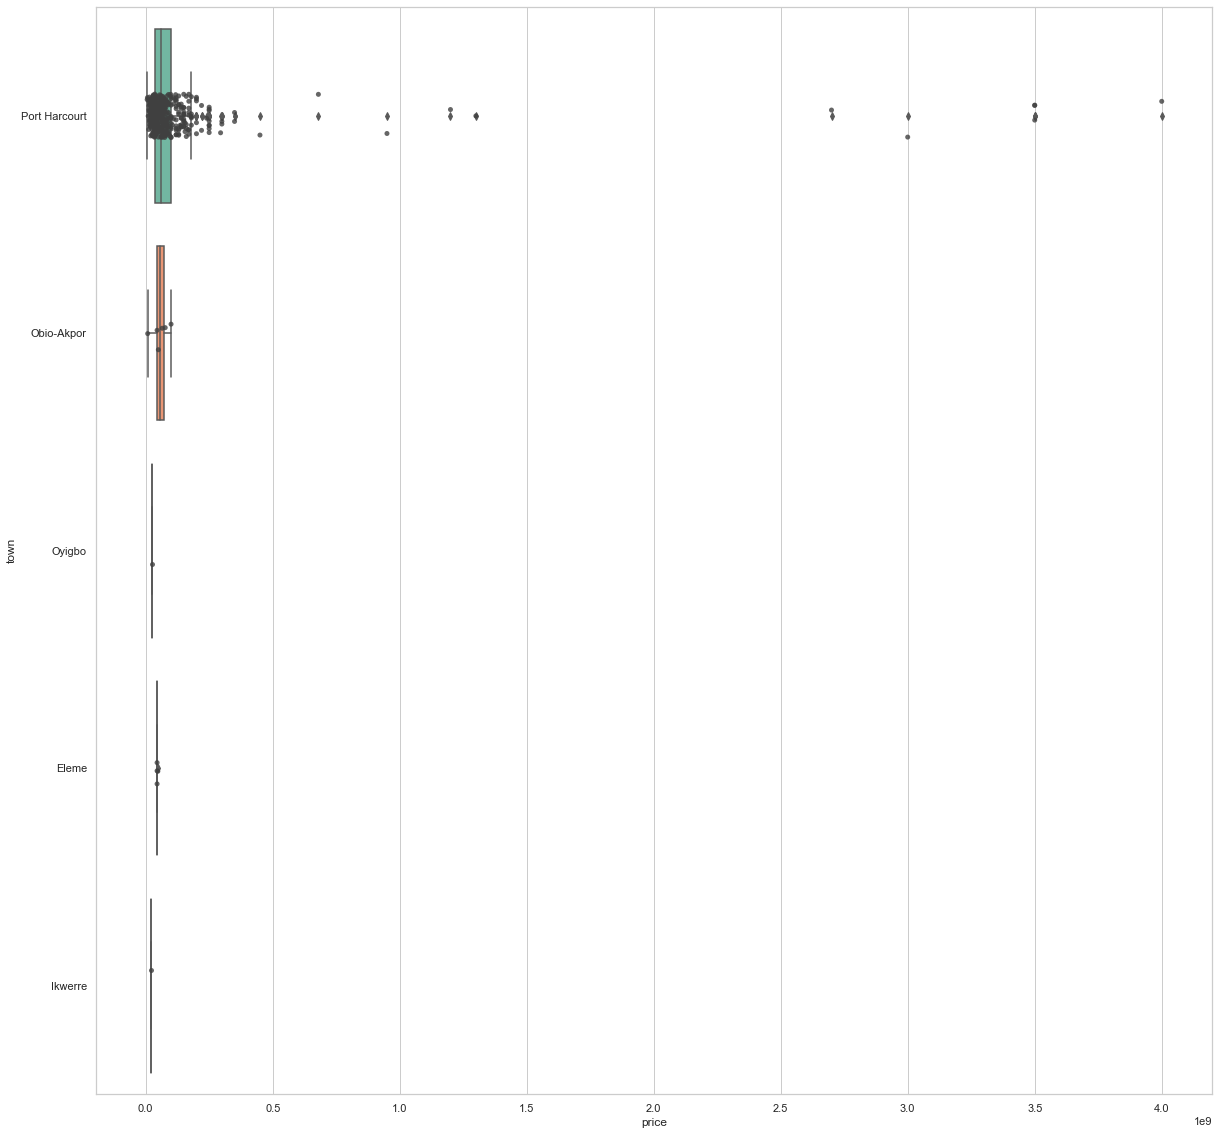

In [237]:
# Plotting a boxplot to visualise the outliers in price column

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_riv["price"], y=df_riv["town"],  palette="Set2",)
sns.stripplot(x=df_riv["price"], y=df_riv["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### InterQuantileRange (IQR)

In [238]:
# Calculating q1 and q3 for price

riv_Q1 = df_riv.price.quantile(0.25)
riv_Q3 = df_riv.price.quantile(0.75)
riv_Q1, riv_Q3

(35860434.0, 100000000.0)

In [239]:
# Calculating InterQuantileRange (IQR) for price

riv_IQR = riv_Q3 - riv_Q1

print("The Interquartile Range for the price is", riv_IQR)

The Interquartile Range for the price is 64139566.0


In [240]:
# Lower and Upper Limit

riv_lower_limit = Q1 - 1.5*riv_IQR
riv_upper_limit = Q3 + 1.5*riv_IQR
riv_lower_limit, riv_upper_limit

(-58209349.0, 256209349.0)

In [241]:
# Identifying the Outliers

riv_price_outliers = df_riv[(df_riv.price < riv_lower_limit)
                            | (df_riv.price > riv_upper_limit)]

riv_price_outliers.shape

(16, 8)

### Removing the Outliers

In [242]:
# Check the shape before removing the outliers

Rivers = df_riv.shape
Rivers

(422, 8)

In [243]:
# Remove the outliers using the IQR

df_riv_outlier_free = df_riv[(df_riv.price > riv_lower_limit)
                             & (df_riv.price < riv_upper_limit)]
df_riv_outlier_free.shape

(406, 8)

<AxesSubplot:xlabel='price', ylabel='town'>

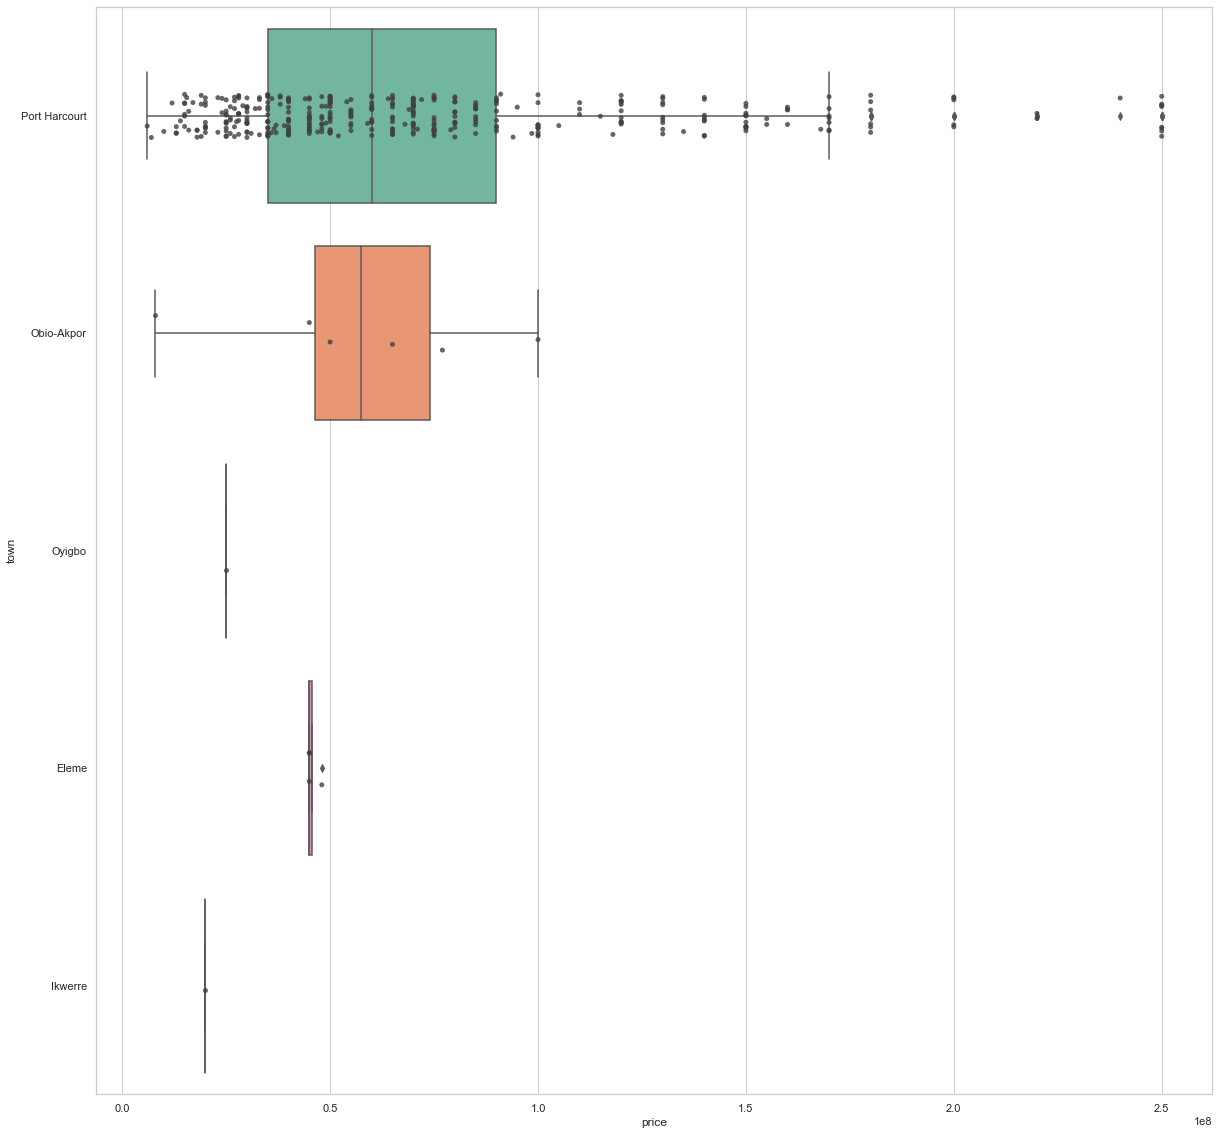

In [244]:
# Plotting a boxplot to validate the changes

# Styling the plot
sns.set_theme(style="whitegrid")

# Scaling the plot
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.boxplot(x=df_riv_outlier_free["price"],
            y=df_riv_outlier_free["town"],  palette="Set2",)
sns.stripplot(x=df_riv_outlier_free["price"],
              y=df_riv_outlier_free["town"], color=".25",
              jitter=True,
              marker='o',
              alpha=0.8)

### RIVERS STATE REAL ESTATE MARKET TREND (Data Analysis)

### Distribution of Features of Properties in Rivers

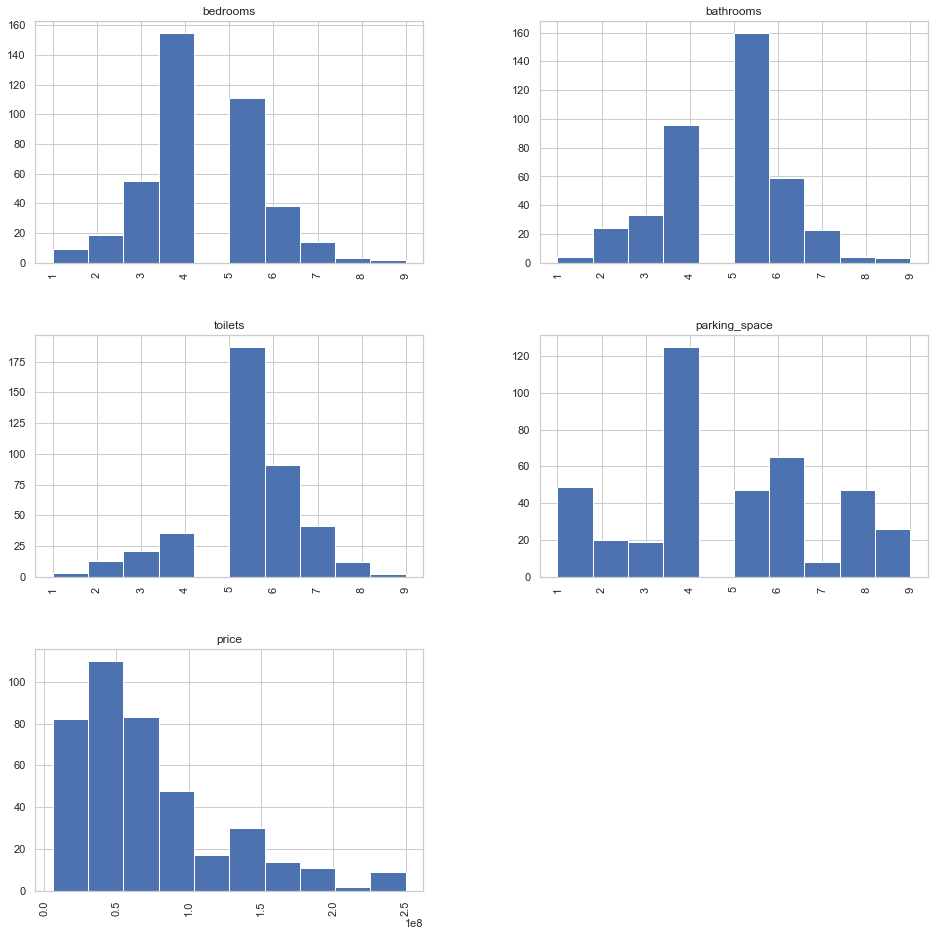

In [245]:
# Plotting histogram

df_riv_outlier_free.hist(figsize=(16, 16), xrot=90)

plt.show()

### Average property price in Rivers

In [246]:
riv_average_price = st.mean(df_riv_outlier_free["price"])

print("The average property price in Rivers State is " +
      str(round(riv_average_price, 2)) + " Naira")

The average property price in Rivers State is 73031561.36 Naira


In [247]:
# Visualise

# Plotting a bar chart

riv_average_price = df_riv_outlier_free.groupby(["town"])["price"]\
                    .mean().sort_index()

fig = px.histogram(x=df_riv_outlier_free["town"].
                   value_counts().sort_index().index,
                   y=riv_average_price,
                   color=df_riv_outlier_free["town"].
                   value_counts().sort_index().index)

fig.update_xaxes(title="Town")
fig.update_yaxes(title="Average Property Price per town in Rivers State")
fig.show()

#### Port Harcourt appears to be the most expensive town to live in Rivers State.

### Most Common Property Type

In [248]:
riv_most_common = st.mode(df_riv_outlier_free["title"])

print("The most common property type in Rivers State is " +
      str(riv_most_common))

The most common property type in Rivers State is Detached Duplex


## CONCLUSIONS AND RECOMMENDATIONS

#### The following conclusions were drawn based on the findings;

#### Usually in real estate, the price is dependent on certain factors such as location, size, furnishing and features of the property. This seemed to be the case with the Nigerian real estate market. 

#### Borno appeared to have the highest property prices which is rather unusual. This is because over the past decade, Borno state as well as it neighbouring states have been severely affected by series of attacks by Boko Haram. This would most likely lead to a decrease in property value or a stall in property price increase. This finding questions the quality of the dataset used for this project and the property market in Borno State. 

#### As the project progressed, it became clear that the columns labelled "title" and "bedrooms" were misleading in some entries. For instance, a survey of the website where the dataset was scraped from revealed that it is uncommon for a block of flats in Nigeria to have only 4 bedrooms. Rather, a block of flats would have 4 or more flats, with each flat having 1 to 4 bedrooms. For clarity, a block of flats with 4 flats and 2 bedrooms each would have 8 bedrooms in total. Therefore an entry in the dataset with 4 bedrooms and titled "block of flats" could either mean a block of flats with 4 one-bedroom flats or a specific 4-bedrooms flat in a block of flats. This leads to inaccurate analysis, as the "price" could be the value of the entire block of flats or one flat in a block of flats. 

#### Next, a quick Google search showed that the towns tagged as "Anambara" in the "state" column do not exist in Anambara State. The towns appear to be in Lagos, Abuja and Ondo state respectively. This is indicative of wrongly collated data. This further reduced the quality of the dataset.

#### In addition, asides from features like number of bedrooms, toilets, type of property, town and state; there are not much information available on the properties. This does not provide sufficient information on the property and could make price prediction a difficult task.

#### Conclusively, to get more accurate insights on the Nigerian property market, care needs to be taken when scrapping the data from property websites and attention to details is necessary when labelling the data in a table format.

## References

#### - Nigeria: https://en.wikipedia.org/wiki/Nigeria
#### - Anambara: https://en.wikipedia.org/wiki/Anambra_State#Cities_and_administrative_divisions 